# Plotting 1: MLM vs. CKKW-L
MLM vs. CKKW-L jet merging.

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (AutoLocator, MaxNLocator)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator)

# My Packages
from plotting import plotting

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load Datasets

In [2]:
path_data = '/youwei_u3/svj_data_master/scheme_1/analysis_script_v1/'
# ! notice: I change the order of 'met' and 'jet'.
dataset_csv = ['status23', 'status71', 'jet', 'met', 'jet_met',
               'n_jet', 'jj', 'jjj', 'jj_met', 'jjj_met']
dataset_npz = ['neutrinos', 'weight']
file = '_rinv3_Lambdad5'

# load .csv into pd.DataFrame()
dataset_mlm, dataset_ckkwl = [], []
for i, data in enumerate(dataset_csv):
    print(i, data)
    # print(i, data + file + '_ckkwl_wo.csv')
    df_mlm = pd.read_csv(path_data + data + file + '_mlm_wo.csv')
    df_ckkwl = pd.read_csv(path_data + data + file + '_ckkwl_wo.csv')
    dataset_mlm.append(df_mlm)
    dataset_ckkwl.append(df_ckkwl)
    
# load .npz into np.array()
nu_mlm = np.load(path_data + 'neutrinos' + file + '_mlm_wo.npz')
nu_ckkwl = np.load(path_data + 'neutrinos' + file + '_ckkwl_wo.npz')
weight_mlm = np.load(path_data + 'weight' + file + '_mlm_wo.npz', allow_pickle=True)
weight_ckkwl = np.load(path_data + 'weight' + file + '_ckkwl_wo.npz', allow_pickle=True)

0 status23
1 status71
2 jet
3 met
4 jet_met
5 n_jet
6 jj
7 jjj
8 jj_met
9 jjj_met


### A. Simple check

In [3]:
len(dataset_ckkwl)

10

In [4]:
dataset_mlm[0].head()

,M_xdxdx,MT_xdxdx,mT_xdxdx,ET_xdxdx,Dphi_xdxdx,Deta_xdxdx,pT_xd,pT_xdx,eta_xd,eta_xdx
0,1462.944229,818.807100,1462.987972,1462.987972,3.121198,2.367836,413.138611,405.502350,0.125119,2.492956
1,1497.885094,1459.086030,1498.916485,1498.916485,3.072587,0.459942,718.225037,741.782776,-0.541898,-1.001840
2,1506.726013,1148.431224,1507.197874,1507.197874,3.130170,1.541384,555.869568,593.006409,-2.086558,-0.545174
3,1359.166609,1282.101304,1359.361923,1359.361923,3.121563,0.689986,631.508850,650.643494,-0.547123,-1.237109
4,1521.987899,1035.577730,1531.877777,1531.877777,2.820393,1.850708,547.682312,502.185699,-1.507787,0.342921


In [5]:
dataset_ckkwl[2].head()

,N_jet,pT_1,pT_2,pT_3,pT_4,eta_1,eta_2,eta_3,eta_4,phi_1,phi_2,phi_3,phi_4,mass_1,mass_2,mass_3,mass_4
0,2.0,87.399442,64.213808,-999.000000,-999.000000,0.187685,0.613261,-999.000000,-999.000000,-0.162607,-0.410417,-999.000000,-999.000000,13.970557,11.678316,-999.000000,-999.000000
1,3.0,156.631723,116.276794,100.766976,-999.000000,-0.720677,-1.840887,-2.304753,-999.000000,1.453170,-2.920251,-2.086857,-999.000000,24.607911,21.576661,12.046796,-999.000000
2,1.0,180.418744,-999.000000,-999.000000,-999.000000,-1.262694,-999.000000,-999.000000,-999.000000,2.763893,-999.000000,-999.000000,-999.000000,34.021953,-999.000000,-999.000000,-999.000000
3,1.0,123.361312,-999.000000,-999.000000,-999.000000,1.777785,-999.000000,-999.000000,-999.000000,-0.543866,-999.000000,-999.000000,-999.000000,23.160264,-999.000000,-999.000000,-999.000000
4,4.0,163.660012,72.199409,33.798631,25.914431,-0.501624,1.195995,1.194867,-0.849276,-2.365578,-2.805764,0.611460,1.376696,33.096091,15.648594,8.263577,8.521142


In [6]:
weight_ckkwl.files

['weight_1', 'weight_2']

In [7]:
weight_ckkwl['weight_2']

array([2.7949634e-14, 2.7949634e-14, 4.1366087e-14, ..., 3.5438452e-14,
       2.7949634e-14, 2.7949634e-14], dtype=float32)

In [8]:
print('For weight_1:')
print(f"* cross-section of MLM = {np.sum(weight_mlm['weight_1'] * (10**9))} pb")
print(f"* cross-section of CKKW-L = {np.sum(weight_ckkwl['weight_1'] * (10**9))} pb")
print('-'*80)
print('For weight_2:')
print(f"* cross-section of MLM = {np.sum(weight_mlm['weight_2'] * (10**9))} pb")
print(f"* cross-section of CKKW-L = {np.sum(weight_ckkwl['weight_2'] * (10**9))} pb")

For weight_1:
* cross-section of MLM = [0.43172395] pb
* cross-section of CKKW-L = [0.57777829] pb
--------------------------------------------------------------------------------
For weight_2:
* cross-section of MLM = 0.43172395461038116 pb
* cross-section of CKKW-L = 0.5777782906857286 pb


##### Conclusion: Well done!!

## 3. Plot

In [9]:
# * define global parameters
binning, binning_50gev = np.linspace(0, 5000, 51), np.linspace(0, 5000, 101)
binning_eta, binning_phi = np.linspace(-10, 10, 41), np.linspace(0, np.pi, 21)
color, label = ['red', 'blue'], ['MLM', 'CKKW-L']
# text
# a. basic
text = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
        r'$r_\mathrm{inv} = 0.3$, $\Lambda_d = 5$ GeV', 'Preselection']
# b. with truth level
text_truth = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$, $\Lambda_d = 5$ GeV', 'Truth level']
# c. with luminosity
text_lum = [r'$\sqrt{s} = 13$ TeV, 139 $\mathrm{fb}^{-1}$', r'$m_{Z^\prime} = 1500$ GeV',
            r'$r_\mathrm{inv} = 0.3$, $\Lambda_d = 5$ GeV', 'Preselection']
# d. with event selection Njet >= 2
text_Njet2 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$, $\Lambda_d = 5$ GeV', r'$N_\mathrm{jet} \geq 2$']
# e. with event selection Njet >= 3
text_Njet3 = [r'$\sqrt{s} = 13$ TeV', r'$m_{Z^\prime} = 1500$ GeV',
              r'$r_\mathrm{inv} = 0.3$, $\Lambda_d = 5$ GeV', r'$N_\mathrm{jet} \geq 3$']
text_xy = (0.05, 0.93)
# weight
w_mlm = weight_mlm['weight_2'] * (10**9)
w_ckkwl = weight_ckkwl['weight_2'] * (10**9)
weight = [w_mlm, w_ckkwl]
weight_normalized = [w_mlm/np.sum(w_mlm), w_ckkwl/np.sum(w_ckkwl)]
# 139 fb^(-1) = 139 pb^(-1) * 1000
luminosity = 139 * 1000
weight_Nevents = [w_mlm * luminosity, w_ckkwl * luminosity]
weight_Nevents_normalized = [(w_mlm * luminosity)/np.sum(w_mlm * luminosity),
                             (w_ckkwl * luminosity)/np.sum(w_ckkwl * luminosity)]
print(f'* Cross-section of MLM and CKKW-L = {np.sum(weight[0])} pb and {np.sum(weight[1])} pb')
print(f'* Number of events of MLM and CKKW-L = {np.sum(weight_Nevents[0])} and {np.sum(weight_Nevents[1])}')
print('-'*80)
# selected events
# a. parton level and preselection
selected_all = [np.arange(dataset_mlm[0].shape[0]), np.arange(dataset_ckkwl[0].shape[0])]
# b. dijet
s_jj_mlm = dataset_mlm[6]['selected'].to_numpy().astype('int64')
s_jj_ckkwl = dataset_ckkwl[6]['selected'].to_numpy().astype('int64')
selected_jj = [s_jj_mlm, s_jj_ckkwl]
# c. trijet
s_jjj_mlm = dataset_mlm[7]['selected'].to_numpy().astype('int64')
s_jjj_ckkwl = dataset_ckkwl[7]['selected'].to_numpy().astype('int64')
selected_jjj = [s_jjj_mlm, s_jjj_ckkwl]
print(f'dtype of selected of MLM: {s_jj_mlm.dtype}\ndtype of selected of CKKW-L: {s_jj_ckkwl.dtype}')

* Cross-section of MLM and CKKW-L = 0.43172395461038116 pb and 0.5777782906857286 pb
* Number of events of MLM and CKKW-L = 60009.62969084298 and 80311.1824053163
--------------------------------------------------------------------------------
dtype of selected of MLM: int64
dtype of selected of CKKW-L: int64


### 3-1. Dark quark pair and parton level
* $M(\chi, \bar{\chi})$
* $M_T(\chi, \bar{\chi})$
* $m_T(\chi, \bar{\chi})$
* $\Delta\phi(\chi, \bar{\chi})$
* $\Delta\eta(\chi, \bar{\chi})$
* $p_T(\chi),\ p_T(\bar{\chi})$
* $\eta(\chi),\ \eta(\bar{\chi})$

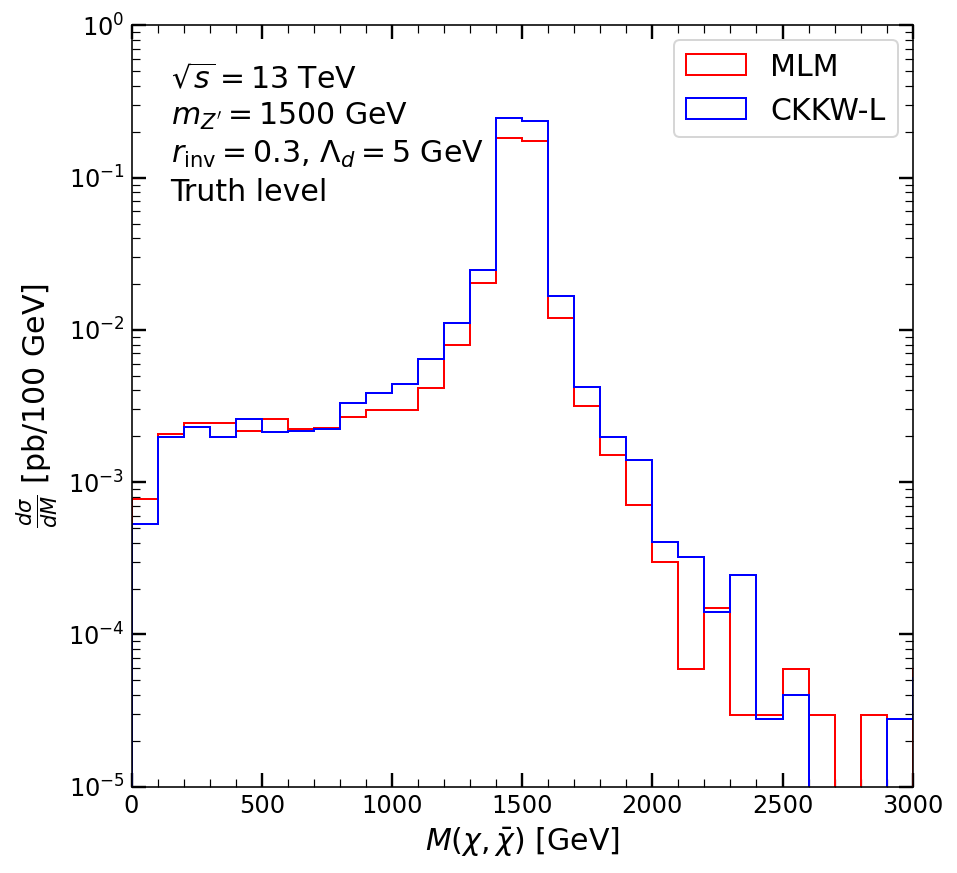

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [10]:
# 1. M(xd, xdx), set_title='Invariant Mass of Dark Quark Pair'
hist, bins = plotting('M_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$M(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_01-M_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

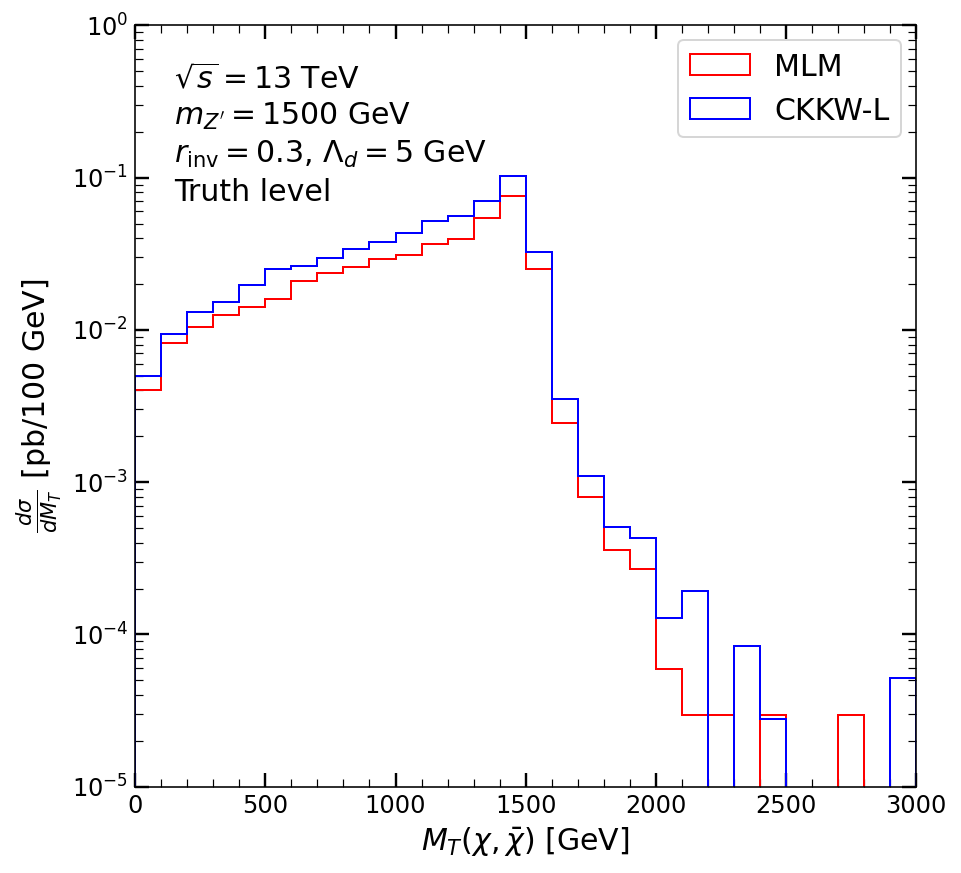

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [11]:
# 2. M_T(xd, xdx), set_title='Transverse Mass of Dark Quark Pair'
hist, bins = plotting('MT_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$M_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_02-MT_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

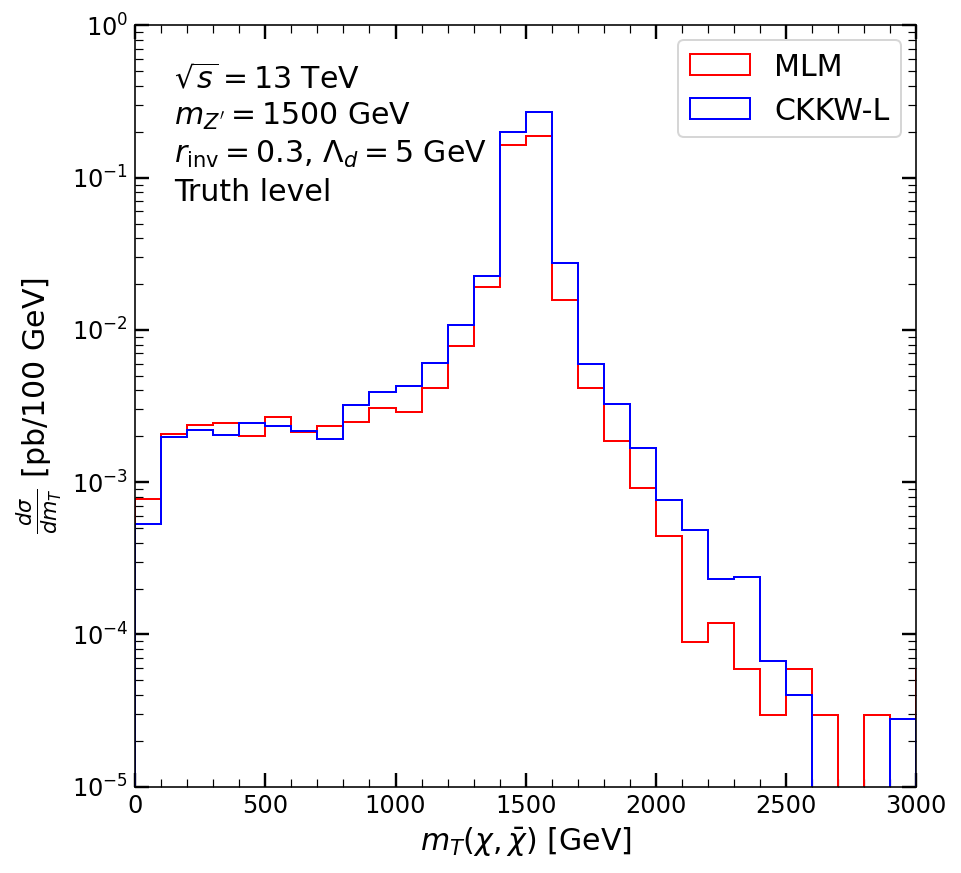

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [12]:
# 3. m_T(xd, xdx), set_title='Transverse Mass of Dark Quark Pair'
hist, bins = plotting('mT_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$m_T(\chi, \bar{\chi})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dm_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_03-mT_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

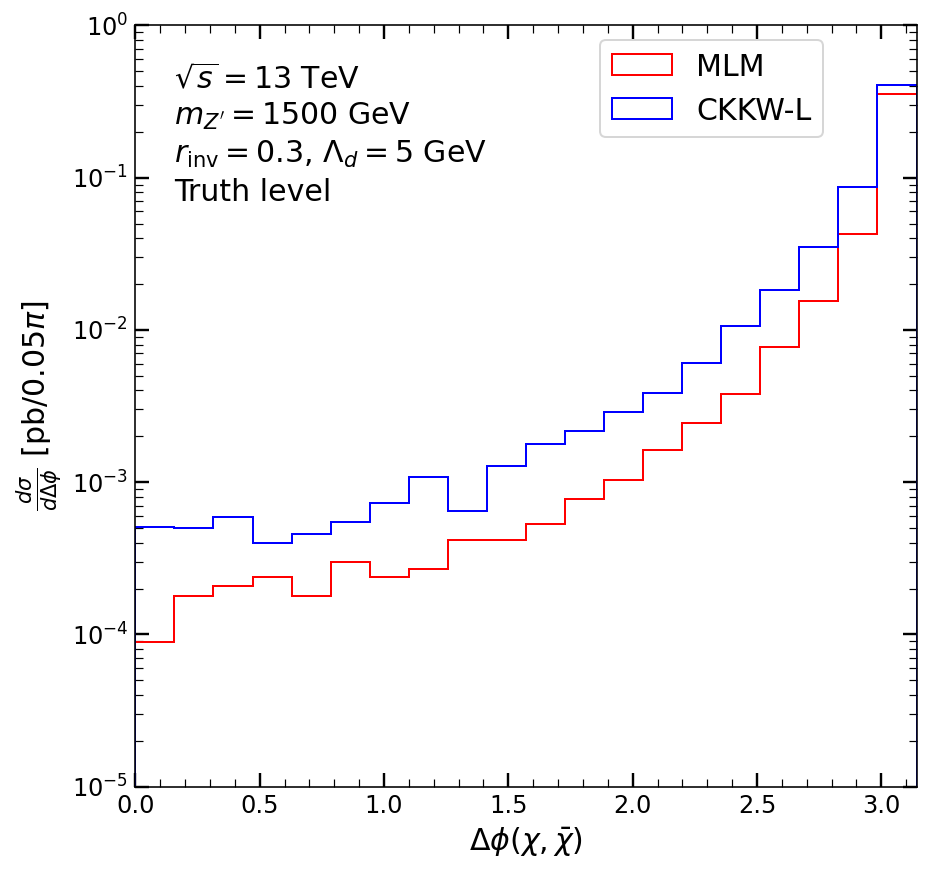

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [13]:
# 4. \Delta\phi(xd, xdx), set_title='Azimuthal Angle Difference of Dark Quark Pair'
hist, bins = plotting('Dphi_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      legend_bbox_to_anchor=(0.9, 1),
                      xlabel=r'$\Delta\phi(\chi, \bar{\chi})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_04-Dphi_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

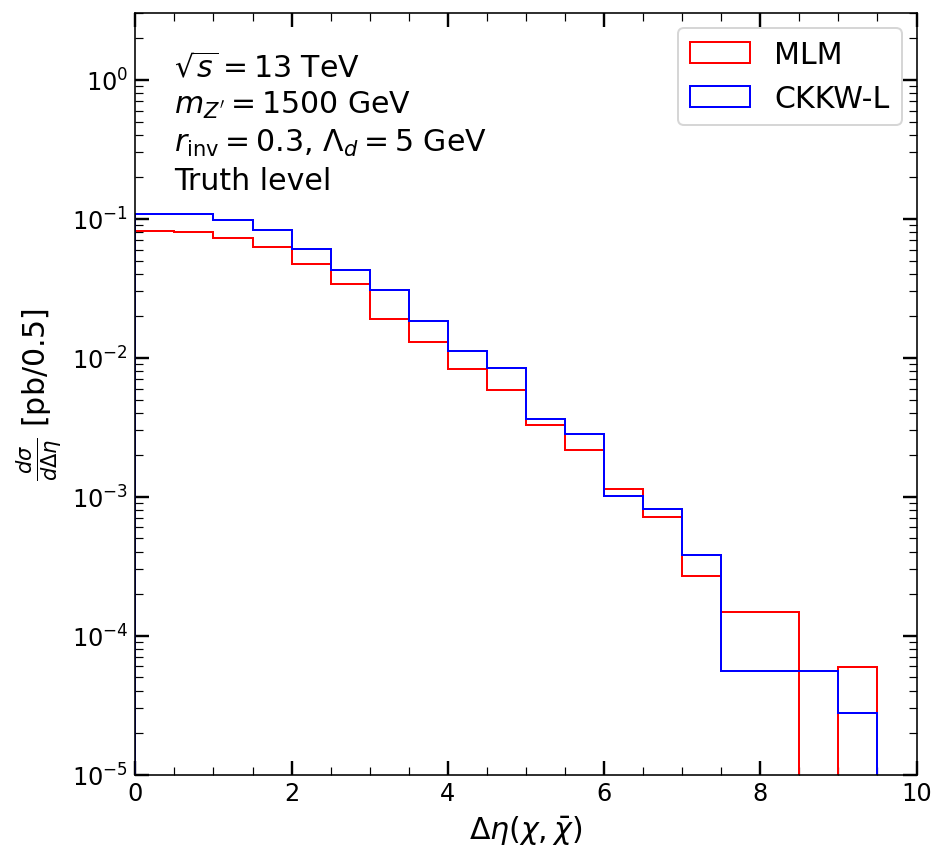

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [14]:
# 5. \Delta\eta(xd, xdx), set_title='Pseudorapidity Difference of Dark Quark Pair'
hist, bins = plotting('Deta_xdxdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      np.linspace(-20, 20, 81), color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\Delta\eta(\chi, \bar{\chi})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 10), ylim=(1/100000, 3),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_05-Deta_xdxdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

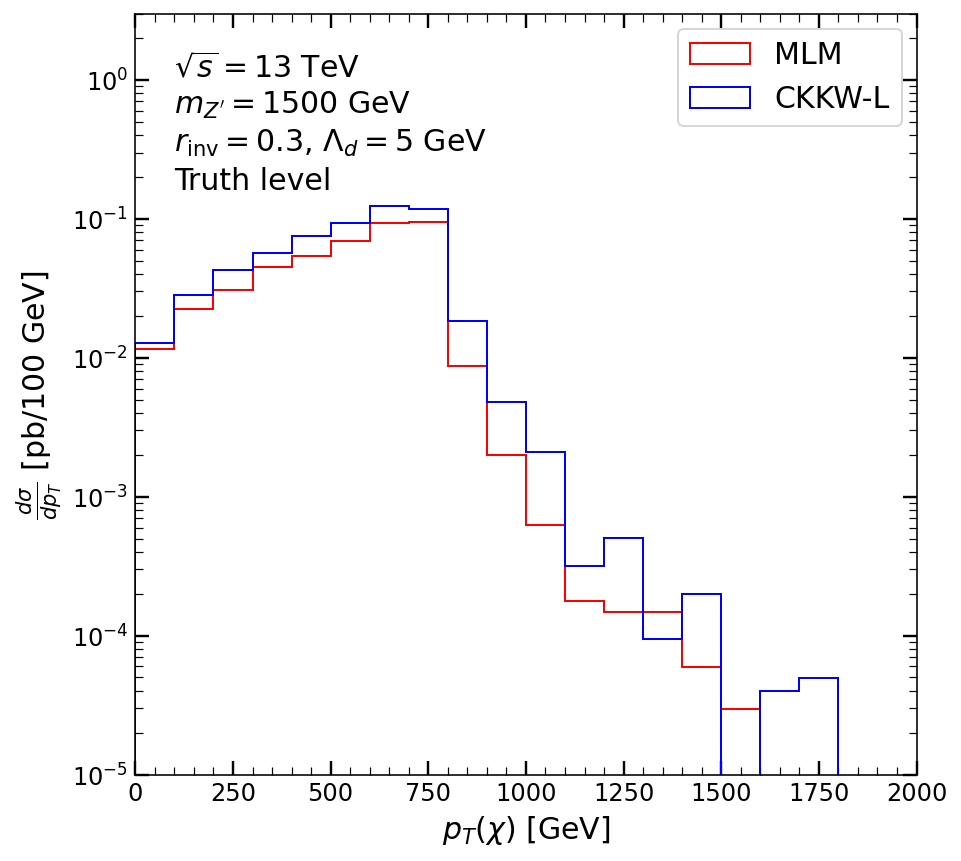

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [15]:
# 6. p_T(xd), set_title='Transverse Momentum of Dark Quark'
hist, bins = plotting('pT_xd', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$p_T(\chi)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_06-pT_xd.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

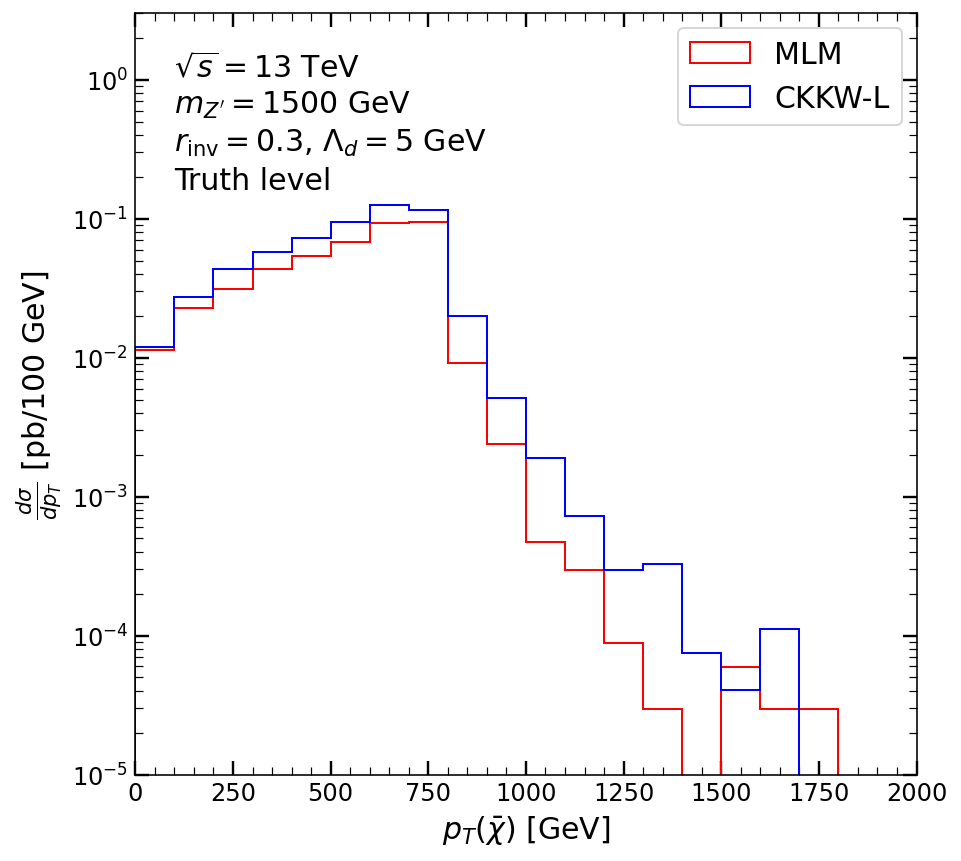

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [16]:
# 7. p_T(xdx), set_title='Transverse Momentum of Dark Antiquark'
hist, bins = plotting('pT_xdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$p_T(\bar{\chi})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_07-pT_xdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

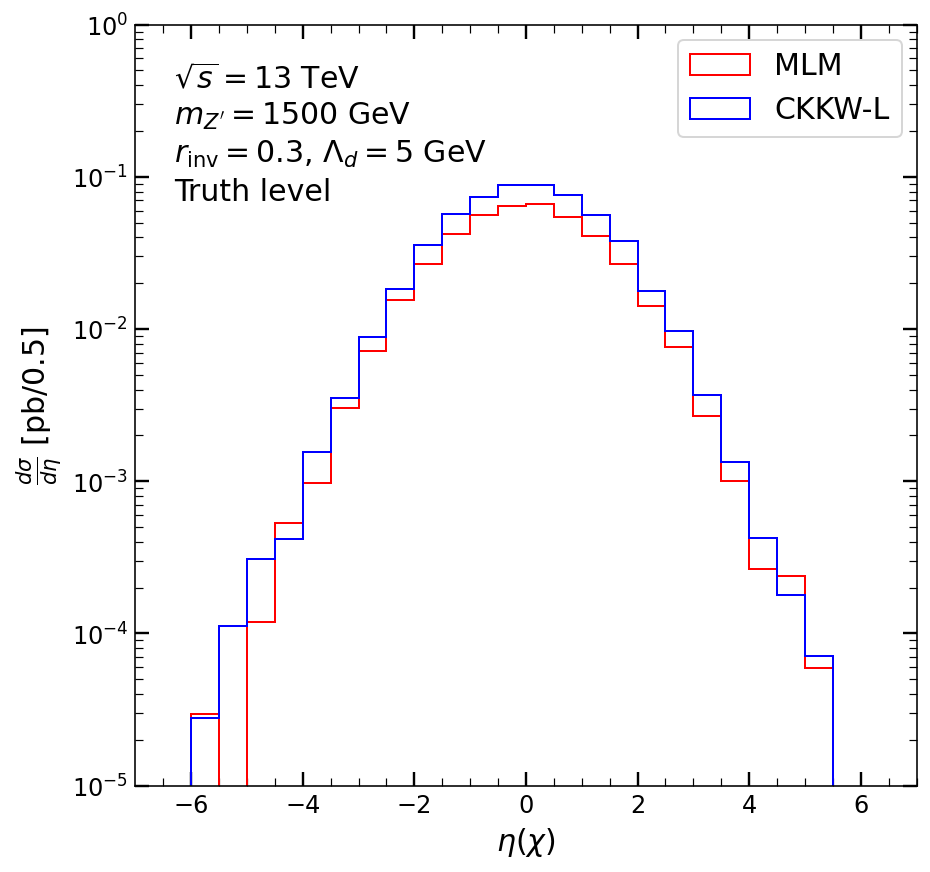

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [17]:
# 8. \eta(xd), set_title='Pseudorapidity of Dark Quark'
hist, bins = plotting('eta_xd', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\eta(\chi)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_08-eta_xd.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

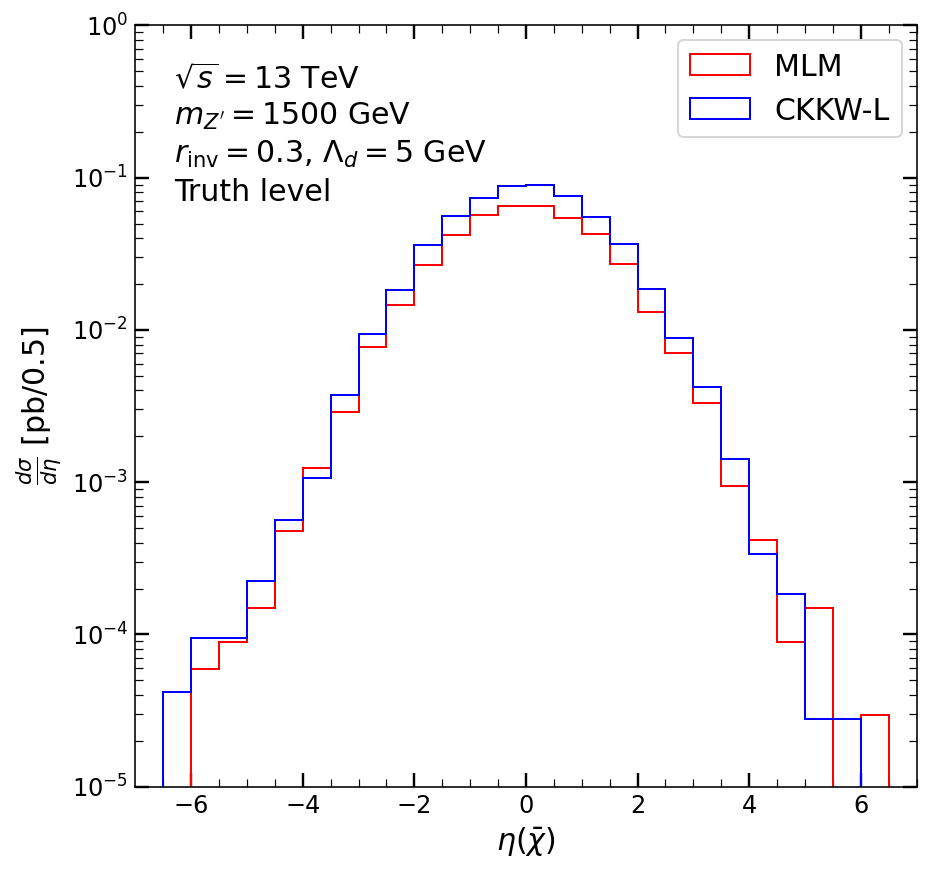

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [18]:
# 9. \eta(xdx), set_title='Pseudorapidity of Dark Antiquark'
hist, bins = plotting('eta_xdx', [dataset_mlm[0], dataset_ckkwl[0]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\eta(\bar{\chi})$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-7, 7), ylim=(1/100000, 1),
                      text=text_truth, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_09-eta_xdx.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

### 3-2. Jet and MET
* jet
* MET
* jet and MET

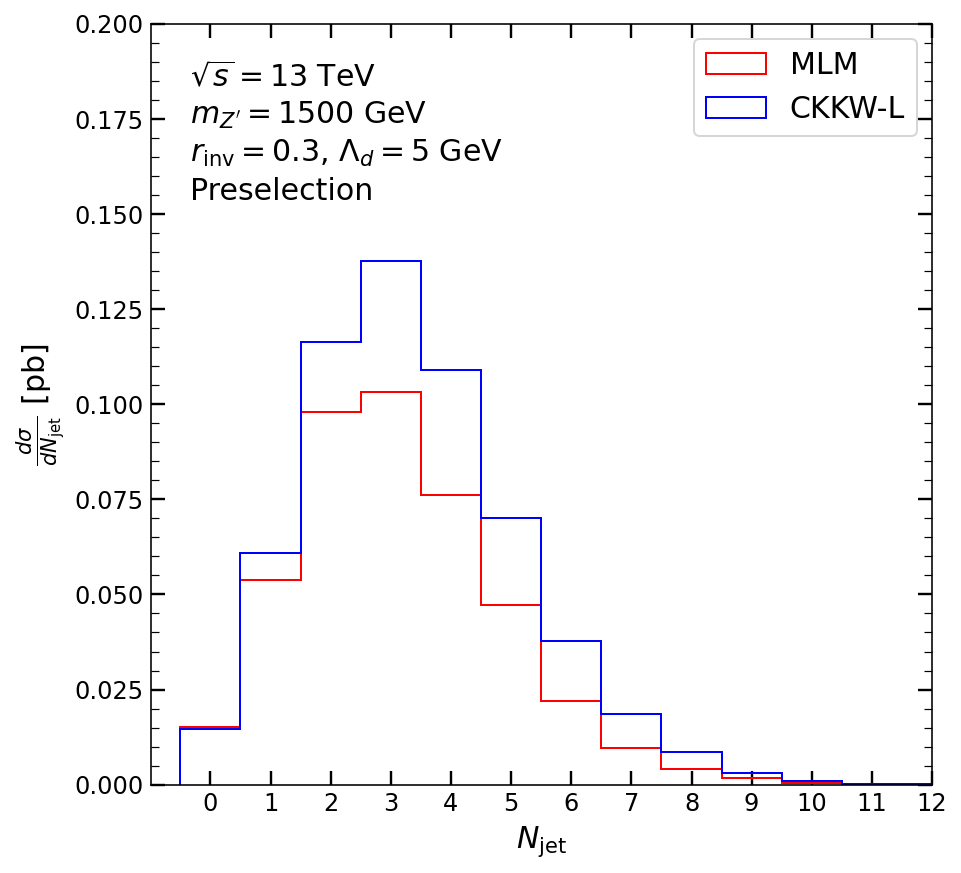

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [19]:
# 10. N_jet with cross-section area, set_title='Number of Jets'
hist, bins = plotting('N_jet', [dataset_mlm[2], dataset_ckkwl[2]],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight, selected=selected_all, align='left',
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\frac{d\sigma}{dN_\mathrm{jet}}$ [pb]',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 0.2),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_10-N_jet.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

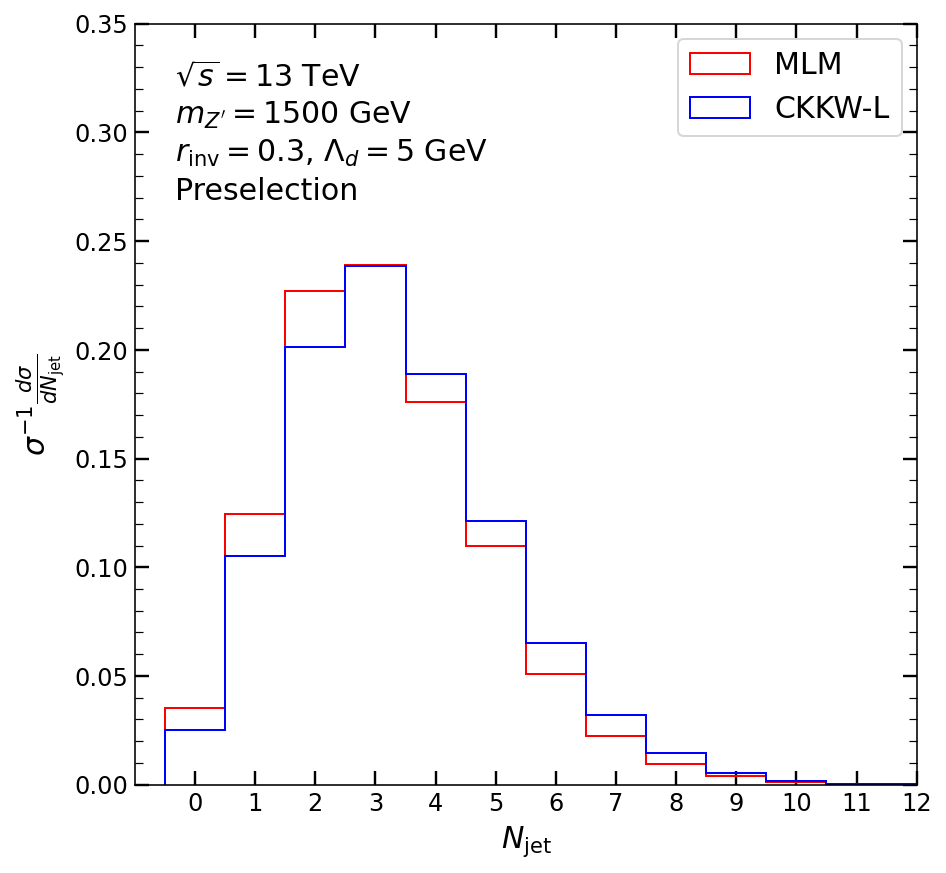

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [1. 1.] pb


In [20]:
# 10. N_jet with cross-section area normalized to 1, set_title='Number of Jets'
hist, bins = plotting('N_jet', [dataset_mlm[2], dataset_ckkwl[2]],
                      np.linspace(0, 20, 21), color, label,
                      density=False,
                      weight=weight_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False,
                      weight_normal=weight,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$\sigma^{-1}\frac{d\sigma}{dN_\mathrm{jet}}$',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 0.35),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_10-N_jet-normalized_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

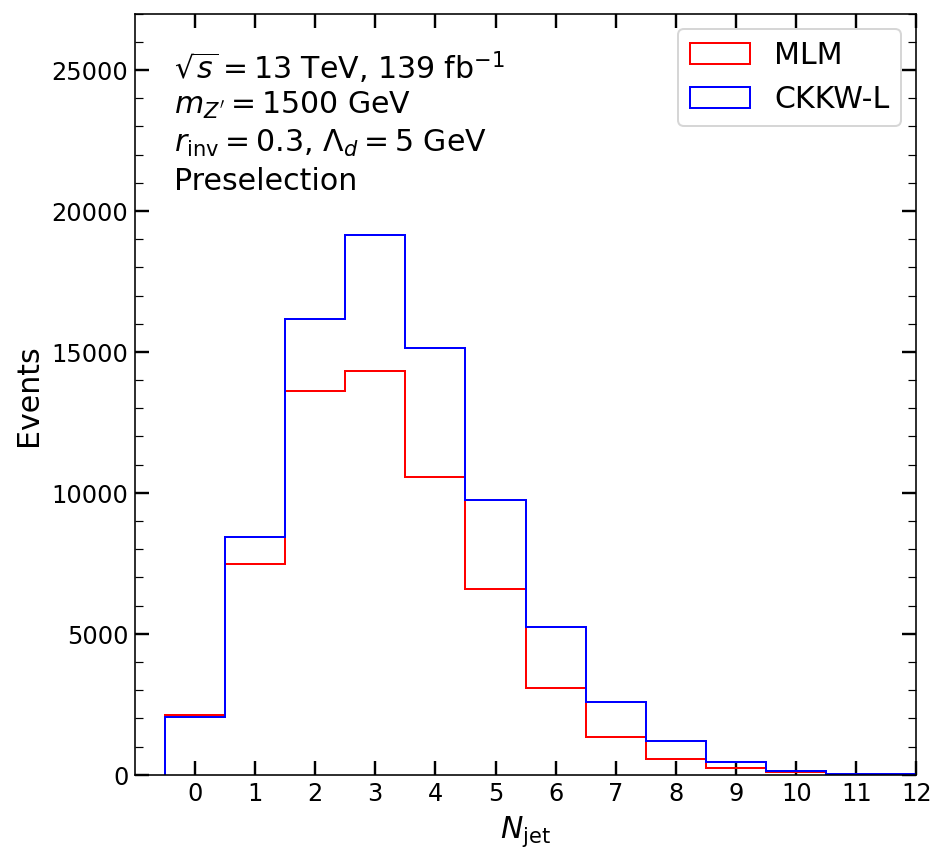

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [60009.62969082 80311.18240531] events


In [21]:
# 10. N_jet with number of events area, set_title='Number of Jets'
hist, bins = plotting('N_jet', [dataset_mlm[2], dataset_ckkwl[2]],
                      np.linspace(0, 20, 21), color, label,
                      weight=weight_Nevents, selected=selected_all, align='left',
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel='Events',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 27000),
                      text=text_lum, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_10-N_jet-Nevents.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} events')

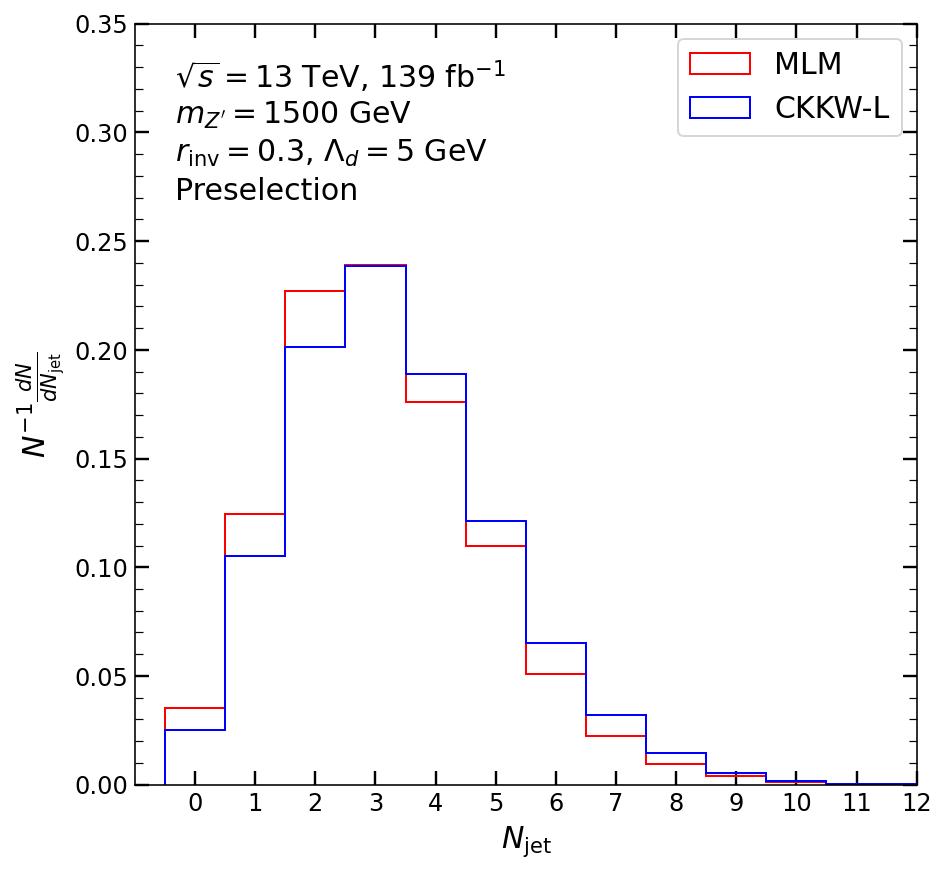

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [1. 1.] events


In [22]:
# 10. N_jet with number of events area normalized to 1, set_title='Number of Jets'
hist, bins = plotting('N_jet', [dataset_mlm[2], dataset_ckkwl[2]],
                      np.linspace(0, 20, 21), color, label,
                      density=False,
                      weight=weight_Nevents_normalized, selected=selected_all,
                      align='left', where='mid',
                      check_normalized_to_1=False,
                      weight_normal=weight_Nevents,
                      set_title=None,
                      xlabel=r'$N_\mathrm{jet}$',
                      ylabel=r'$N^{-1}\frac{dN}{dN_\mathrm{jet}}$',
                      xmajor_locator=MultipleLocator(1),
                      xminor_locator=MultipleLocator(1),
                      xlim=(-0.99, 12), ylim=(0, 0.35),
                      text=text_lum, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_10-N_jet-Nevents_normalized_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} events')

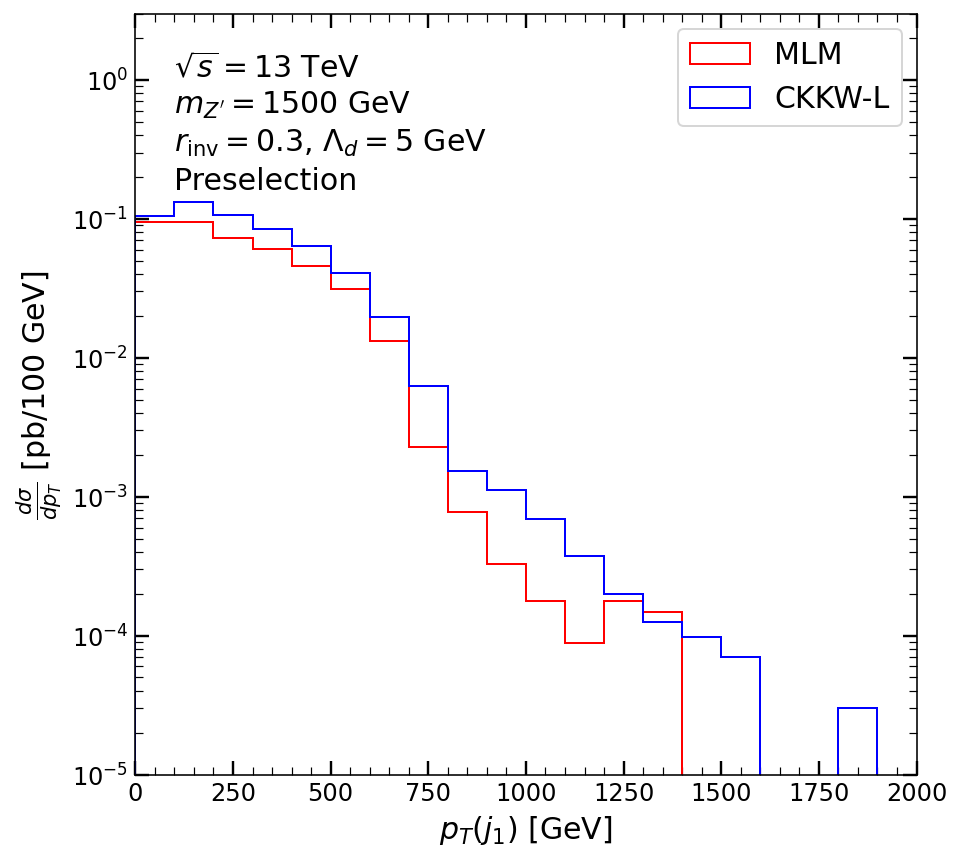

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.41654141 0.56311376] pb


In [23]:
# 11. p_T(j_1), set_title='Transverse Momentum of Leading Jet'
hist, bins = plotting('pT_1', [dataset_mlm[2], dataset_ckkwl[2]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_11-pT_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

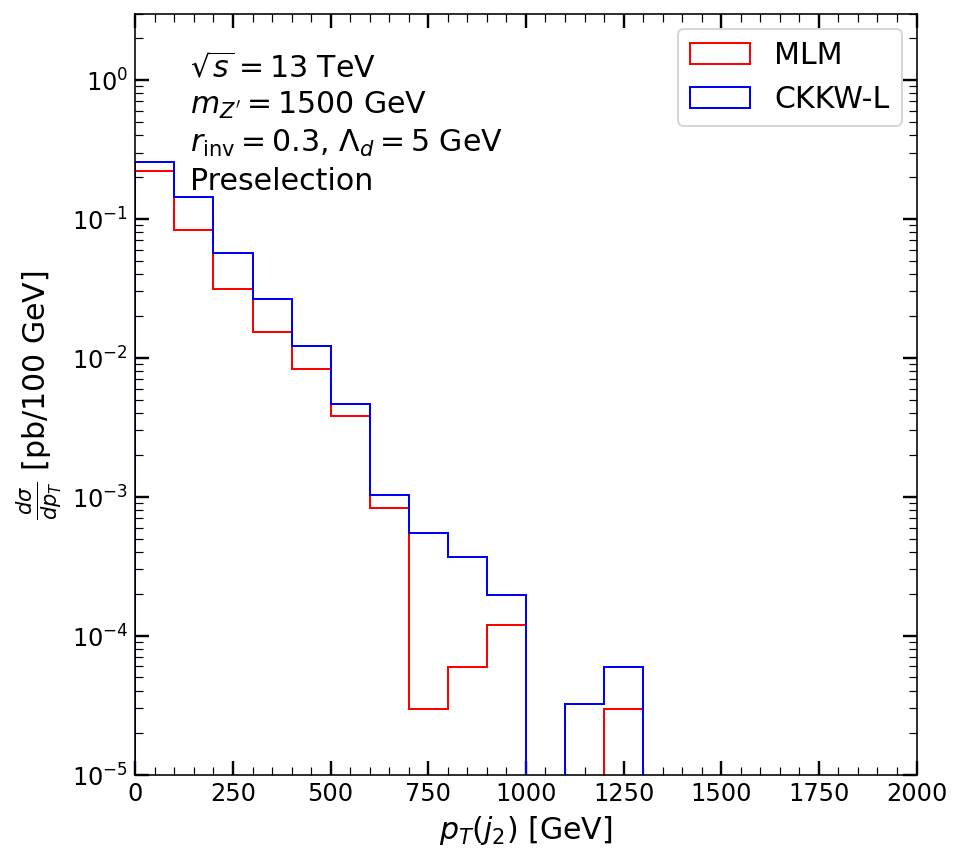

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [24]:
# 12. p_T(j_2), set_title='Transverse Momentum of Sub-leading Jet'
hist, bins = plotting('pT_2', [dataset_mlm[2], dataset_ckkwl[2]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text, text_xy=(0.07, 0.93), savefig='./figures_1_mlm_ckkwl/fig_12-pT_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

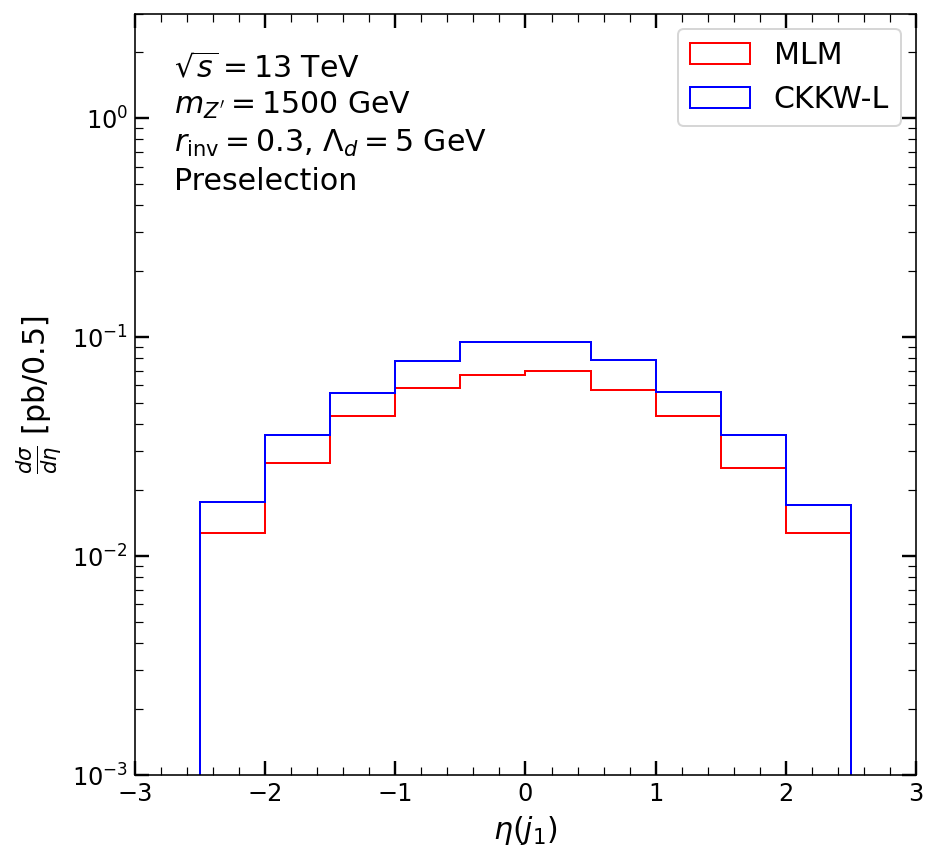

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.41654141 0.56311376] pb


In [25]:
# 13. \eta(j_1), set_title='Pseudorapidity of Leading Jet'
hist, bins = plotting('eta_1', [dataset_mlm[2], dataset_ckkwl[2]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_13-eta_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

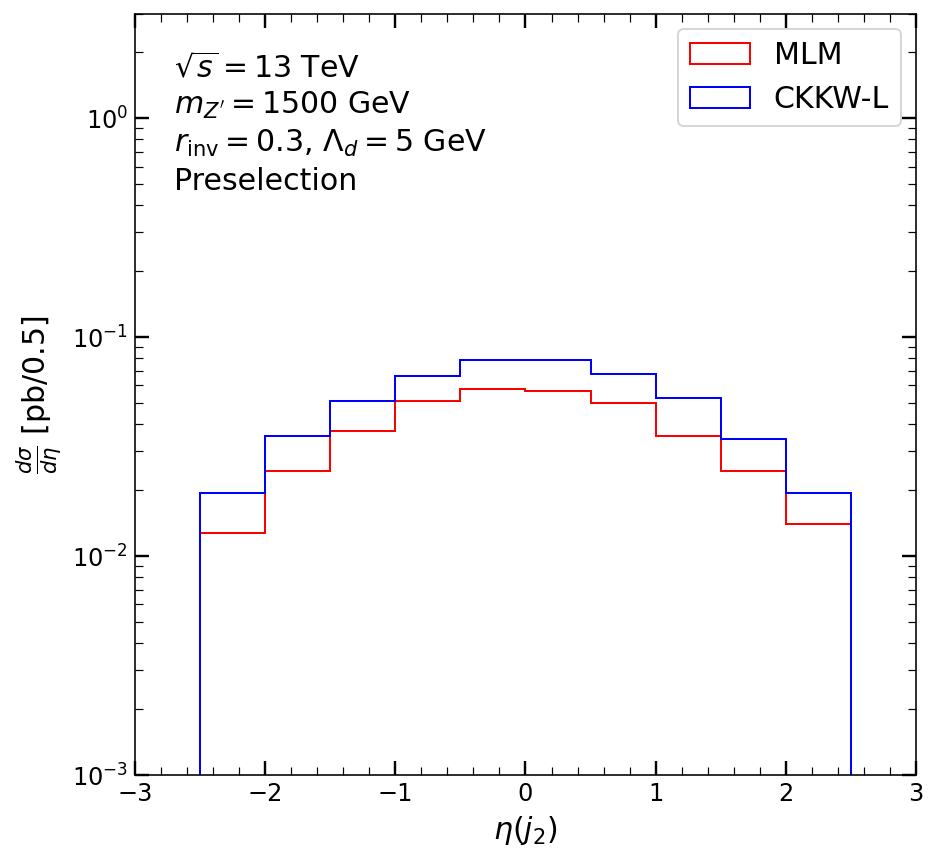

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [26]:
# 14. \eta(j_2), set_title='Pseudorapidity of Sub-leading Jet'
hist, bins = plotting('eta_2', [dataset_mlm[2], dataset_ckkwl[2]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 3),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_14-eta_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

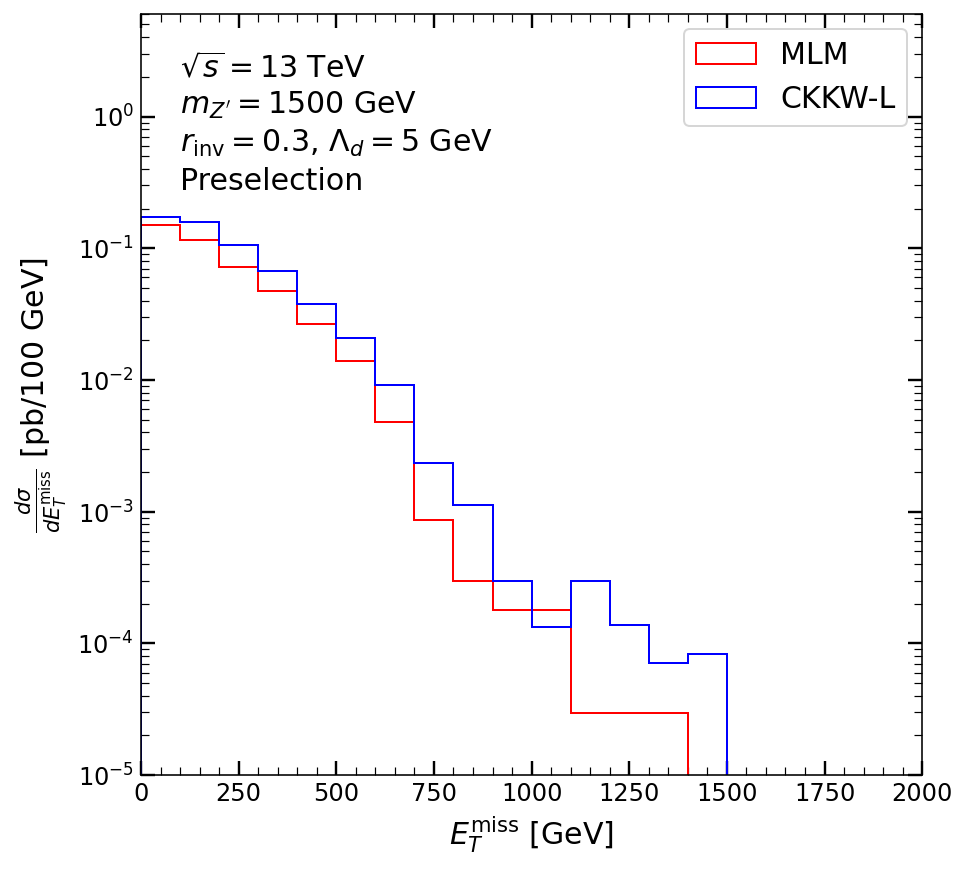

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [27]:
# 15. MET, set_title='Missing Transverse Energy'
hist, bins = plotting('MET', [dataset_mlm[3], dataset_ckkwl[3]],
                      binning, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$E_T^\mathrm{miss}$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dE_T^\mathrm{miss}}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 6),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_15-MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

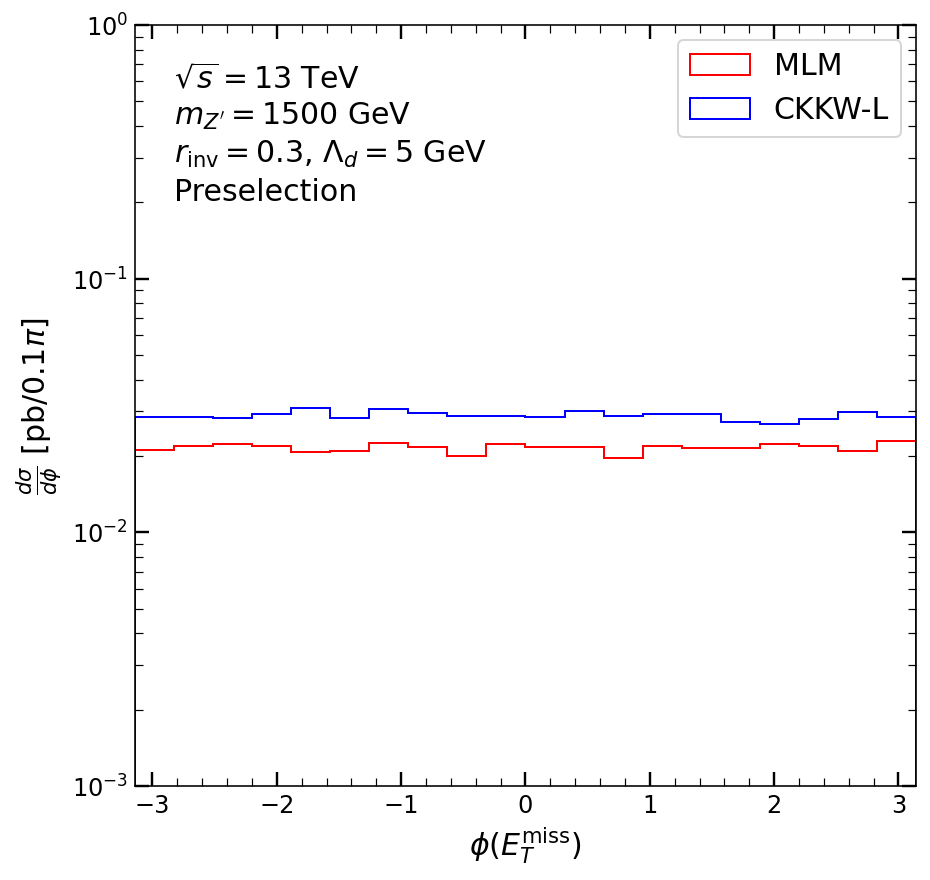

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.43172395 0.57777829] pb


In [28]:
# 16. \phi(MET), set_title='Azimuthal Angle of Missing Transverse Momentum'
hist, bins = plotting('phi', [dataset_mlm[3], dataset_ckkwl[3]],
                      np.linspace(-np.pi, np.pi, 21), color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\phi(E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\phi}$ [pb/$0.1\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-np.pi, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_16-phi_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

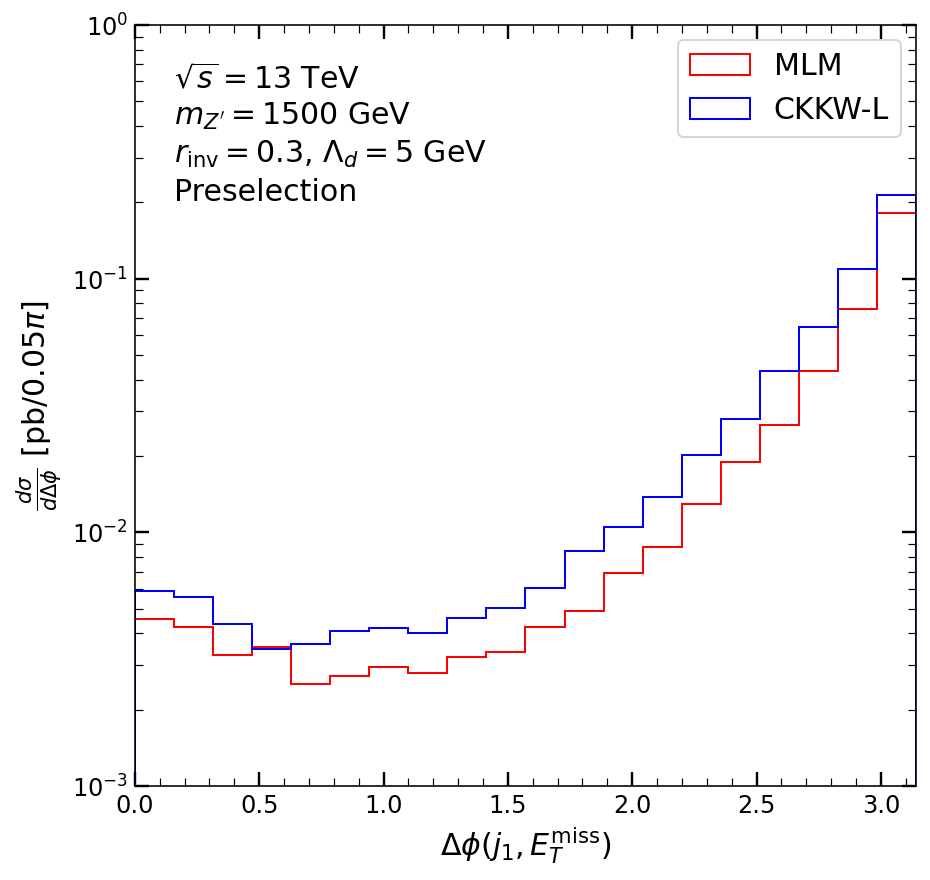

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.41654141 0.56311376] pb


In [29]:
# 17. \Delta\phi(j_1, MET), set_title='Azimuthal Separation between Leading Jet and MET'
hist, bins = plotting('Dphi_j1_MET', [dataset_mlm[4], dataset_ckkwl[4]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_17-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

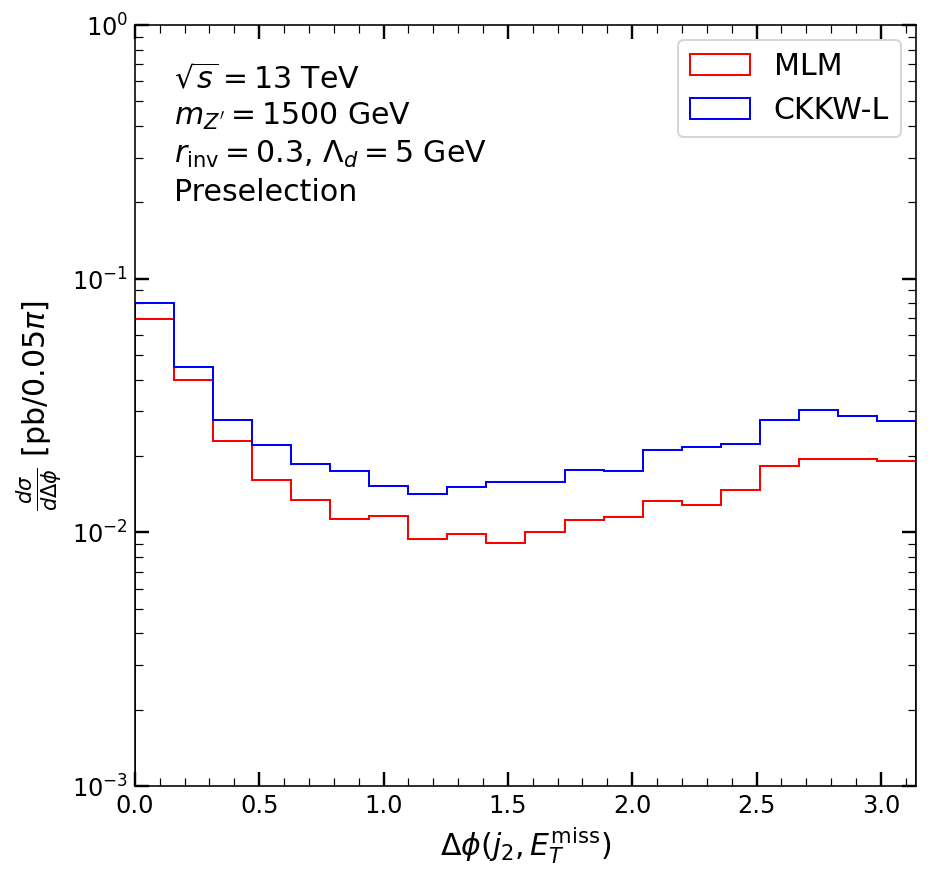

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [30]:
# 18. \Delta\phi(j_2, MET), set_title='Azimuthal Separation between Sub-leading Jet and MET'
hist, bins = plotting('Dphi_j2_MET', [dataset_mlm[4], dataset_ckkwl[4]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_18-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

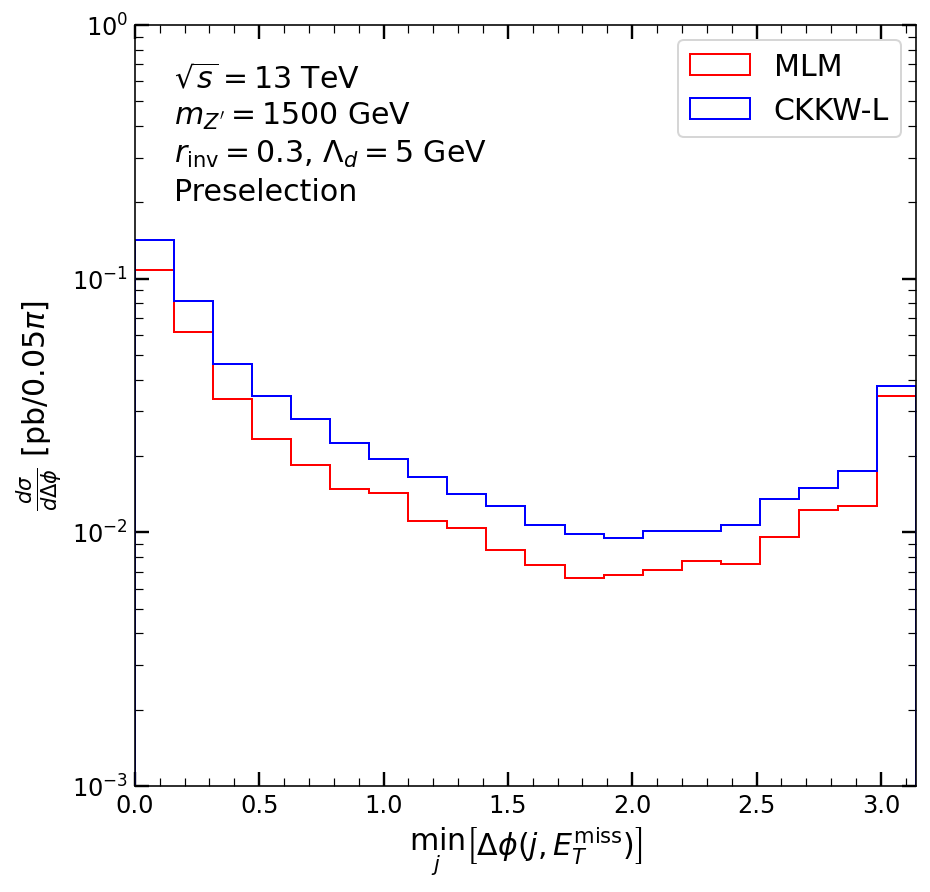

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.41654141 0.56311376] pb


In [31]:
# 19. \min\Delta\phi(j, MET), set_title='The Minimum Azimuthal Separation between Any Jets and MET'
hist, bins = plotting('min_Dphi_j_MET', [dataset_mlm[4], dataset_ckkwl[4]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_all,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_19-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

### 3-3. Event selection $N_\mathrm{jet} \ge 2$

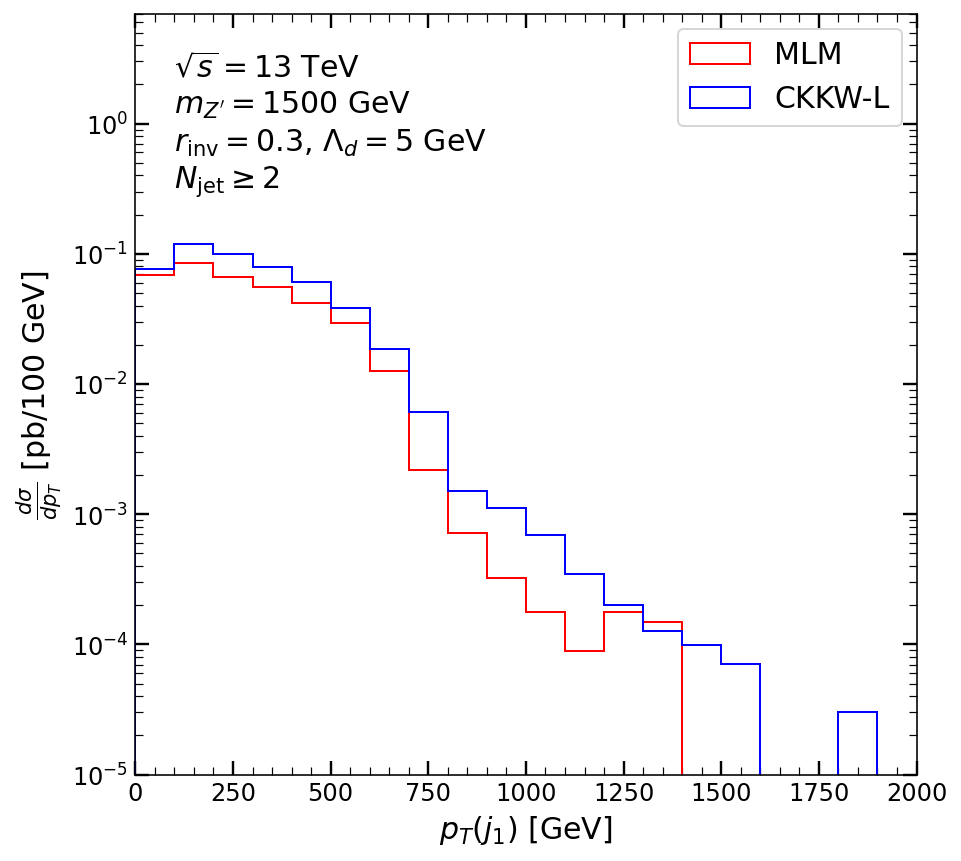

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [32]:
# 20. p_T(j_1) when N_jet >= 2, set_title='Transverse Momentum of Leading Jet'
hist, bins = plotting('pT_1', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_20-dijet-pT_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

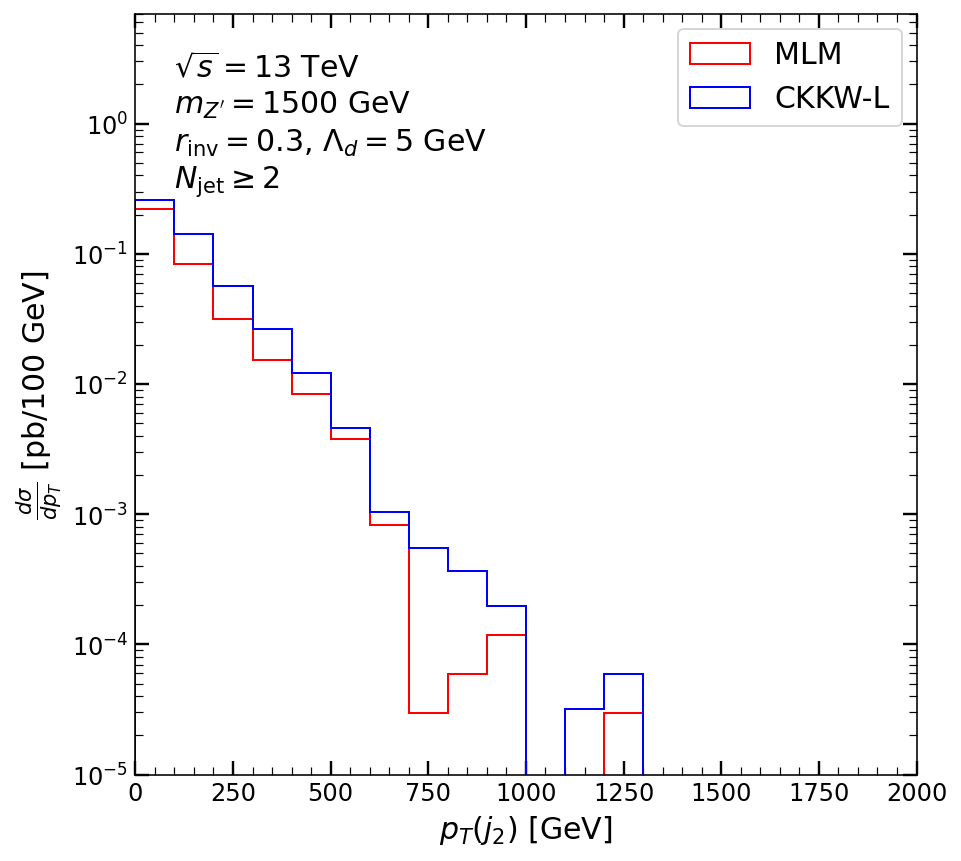

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [33]:
# 21. p_T(j_2) when N_jet >= 2, set_title='Transverse Momentum of Sub-leading Jet'
hist, bins = plotting('pT_2', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 7),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_21-dijet-pT_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

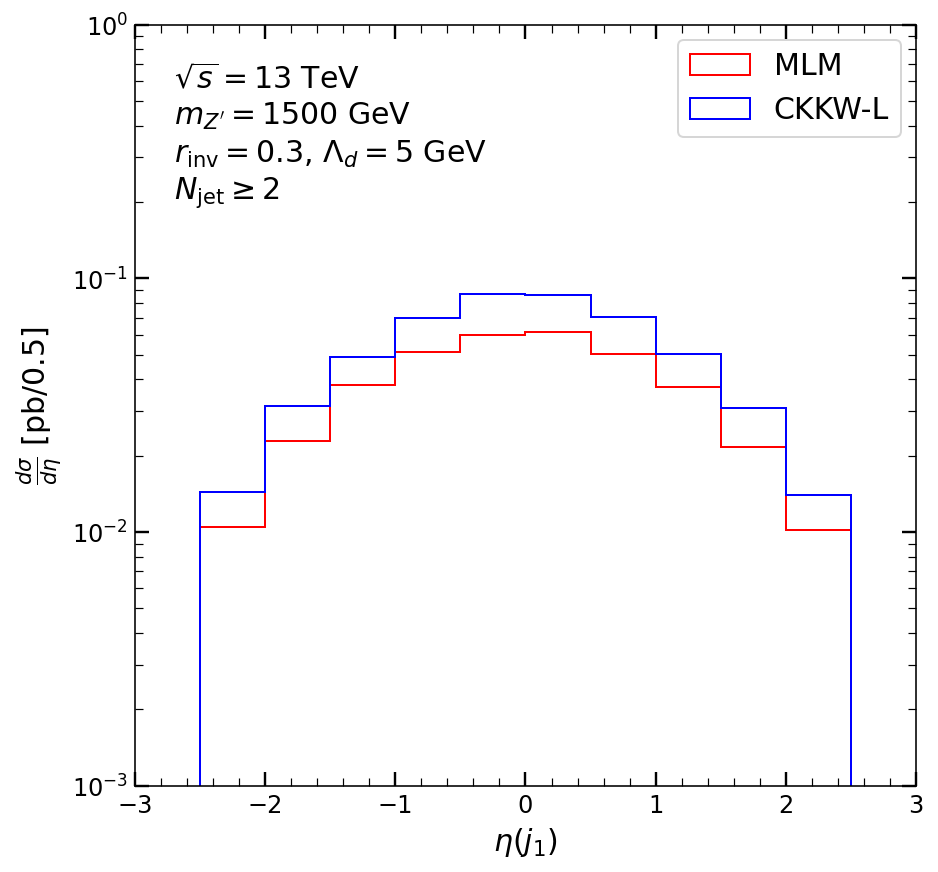

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [34]:
# 22. \eta(j_1) when N_jet >= 2, set_title='Pseudorapidity of Leading Jet'
hist, bins = plotting('eta_1', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_22-dijet-eta_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

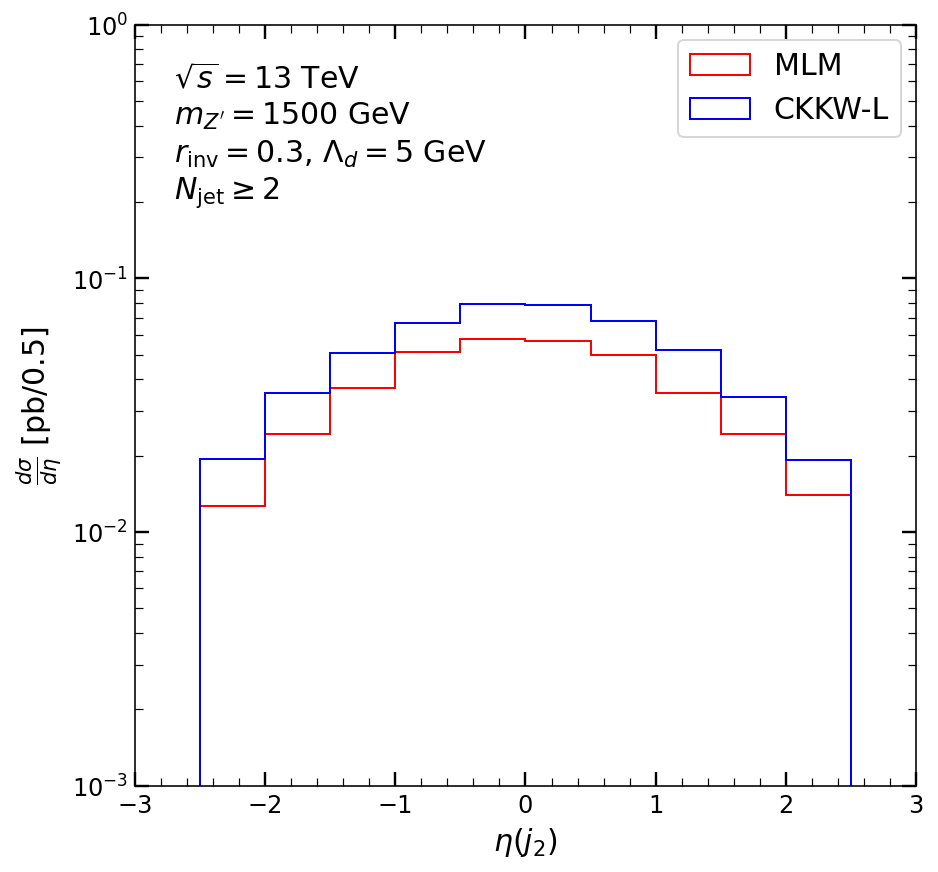

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [35]:
# 23. \eta(j_2) when N_jet >= 2, set_title='Pseudorapidity of Sub-leading Jet'
hist, bins = plotting('eta_2', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_23-dijet-eta_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

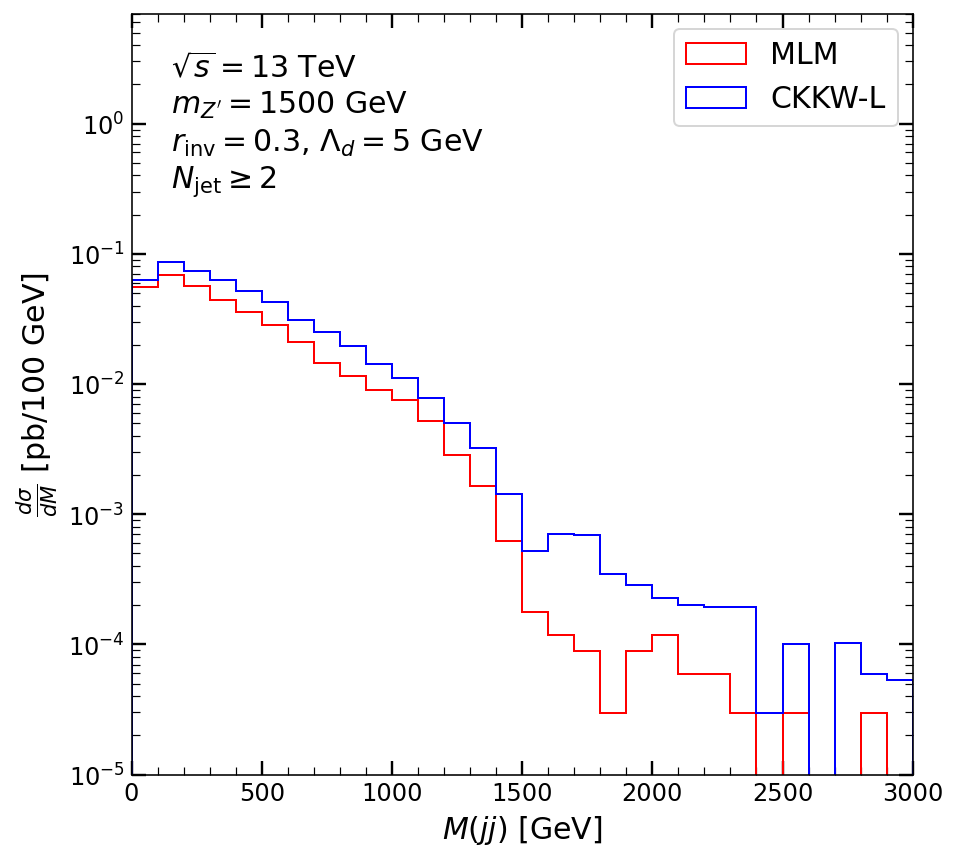

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [36]:
# 24. M(jj) when N_jet >= 2, set_title='Invariant Mass of Dijet'
hist, bins = plotting('M_jj', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$M(jj)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 7),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_24-dijet-M_jj.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

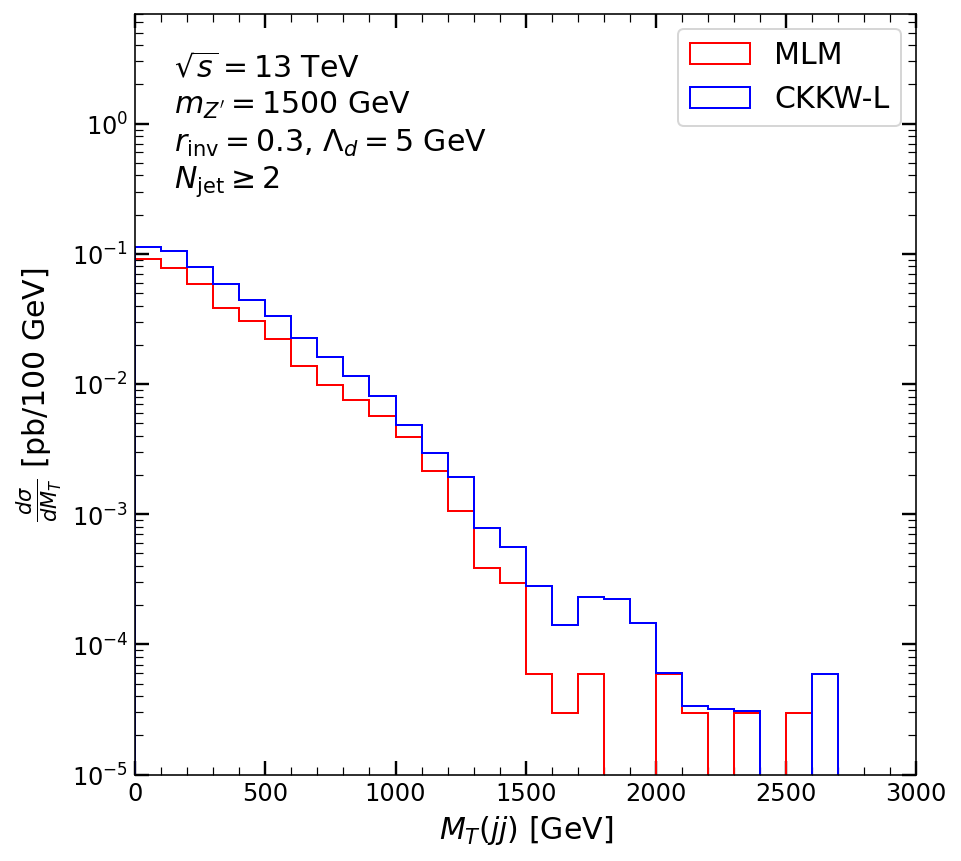

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [37]:
# 25. M_T(jj) when N_jet >= 2, set_title='Transverse Mass of Dijet'
hist, bins = plotting('MT_jj', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$M_T(jj)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 7),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_25-dijet-MT_jj.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

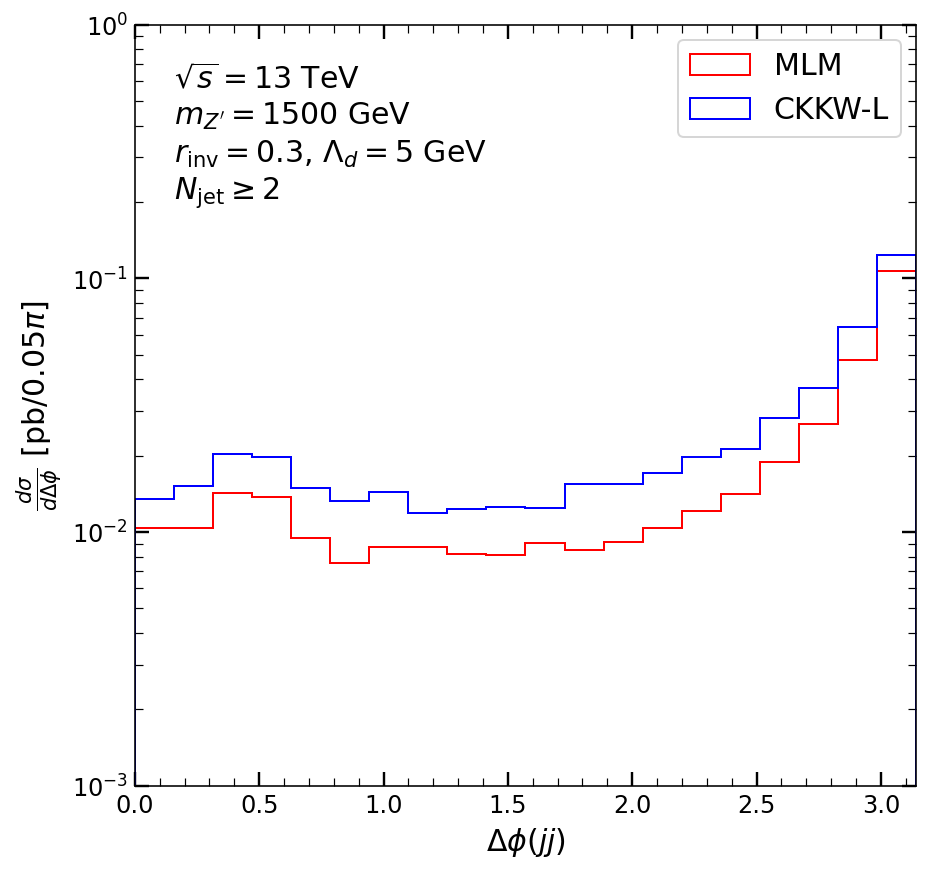

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [38]:
# 26. \Delta\phi(jj) when N_jet >= 2, set_title='Azimuthal Separation of Dijet'
hist, bins = plotting('Dphi', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(jj)$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_26-dijet-Dphi.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

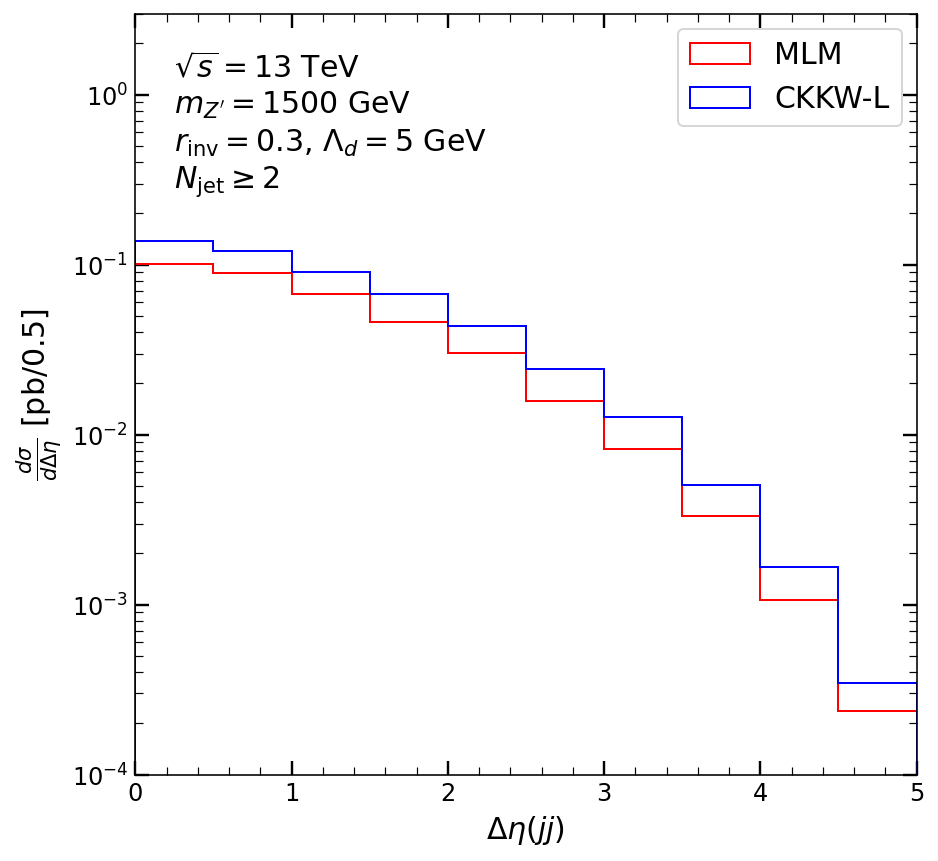

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [39]:
# 27. \Delta\eta(jj) when N_jet >= 2, set_title='Pseudorapidity Difference of Dijet'
hist, bins = plotting('Deta', [dataset_mlm[6], dataset_ckkwl[6]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\Delta\eta(jj)$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 5), ylim=(1/10000, 3),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_27-dijet-Deta.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

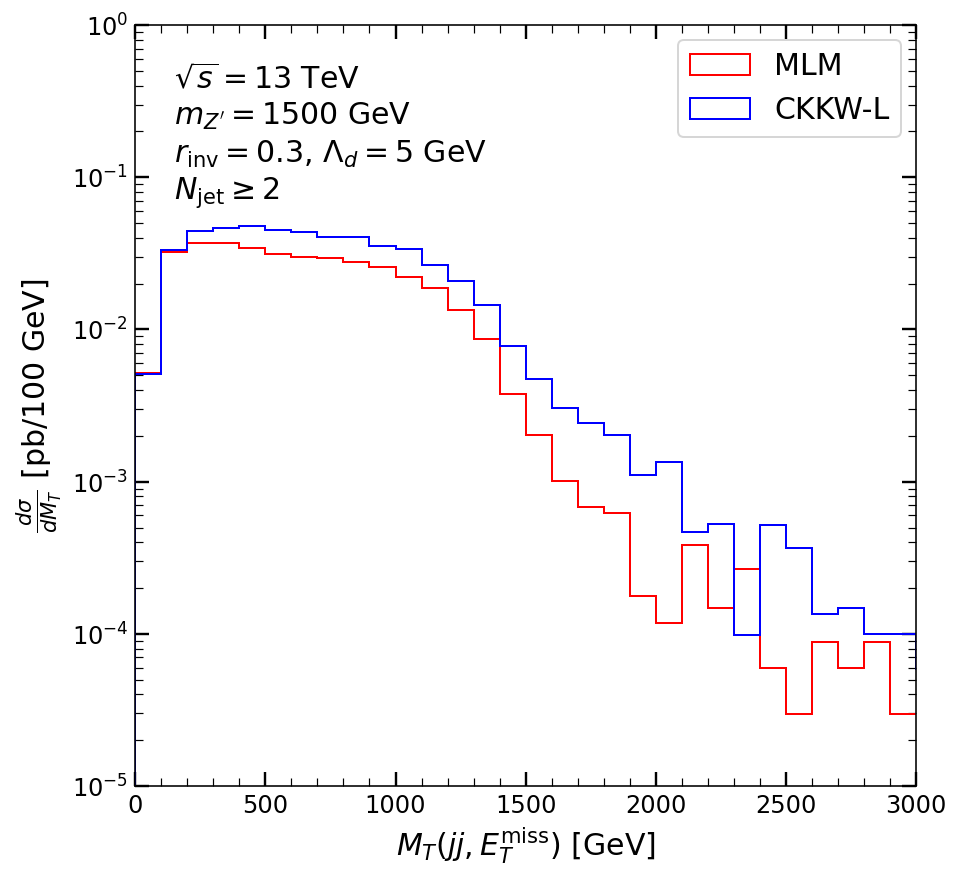

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [40]:
# 28. M_T(jj, MET) when N_jet >= 2, set_title='Transverse Mass of Dijet and MET'
hist, bins = plotting('MT_jj_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$M_T(jj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_28-dijet-MT_jj_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

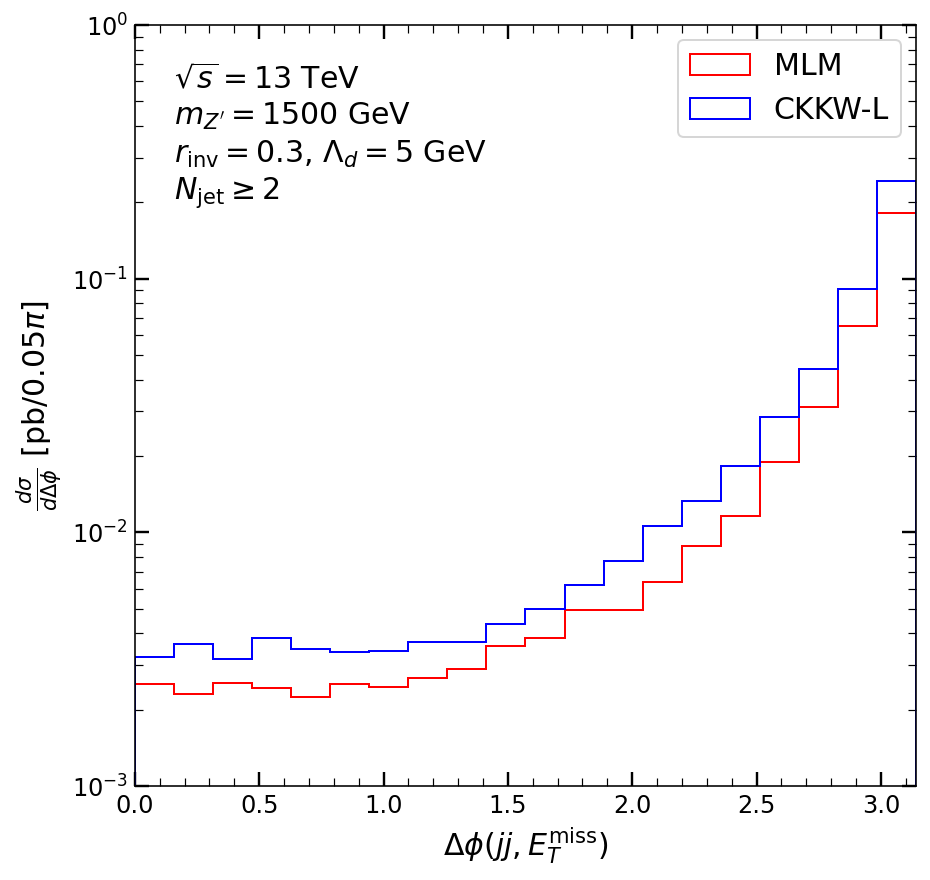

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [41]:
# 29. \Delta\phi(jj, MET) when N_jet >= 2, set_title='Azimuthal Separation between Dijet and MET'
hist, bins = plotting('Dphi_jj_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(jj, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_29-dijet-Dphi_jj_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

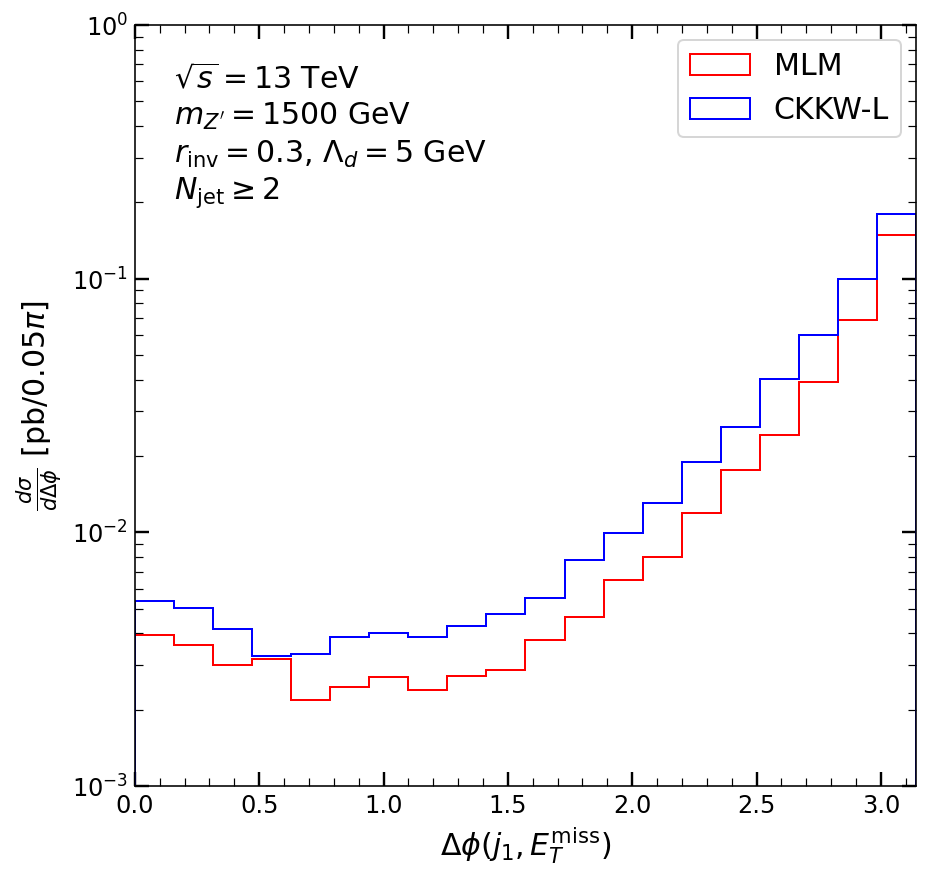

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [42]:
# 30. \Delta\phi(j_1, MET) when N_jet >= 2, set_title='Azimuthal Separation between Leading Jet and MET'
hist, bins = plotting('Dphi_j1_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_30-dijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

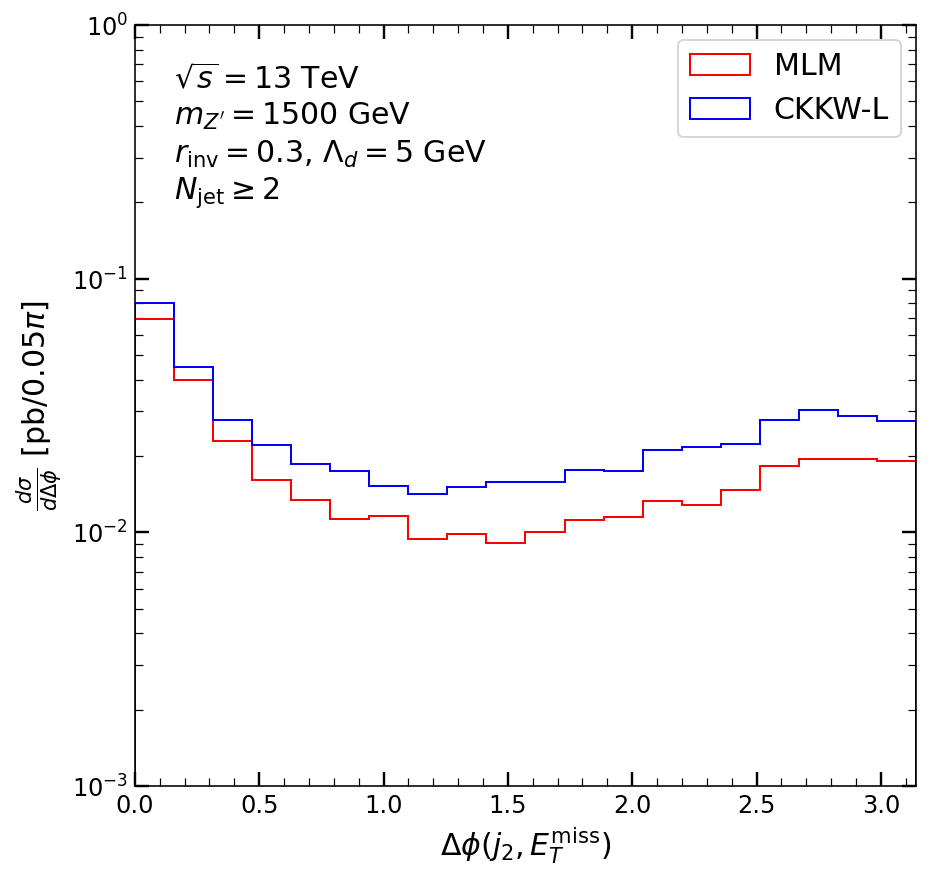

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [43]:
# 31. \Delta\phi(j_2, MET) when N_jet >= 2, set_title='Azimuthal Separation between Sub-leading Jet and MET'
hist, bins = plotting('Dphi_j2_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_31-dijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

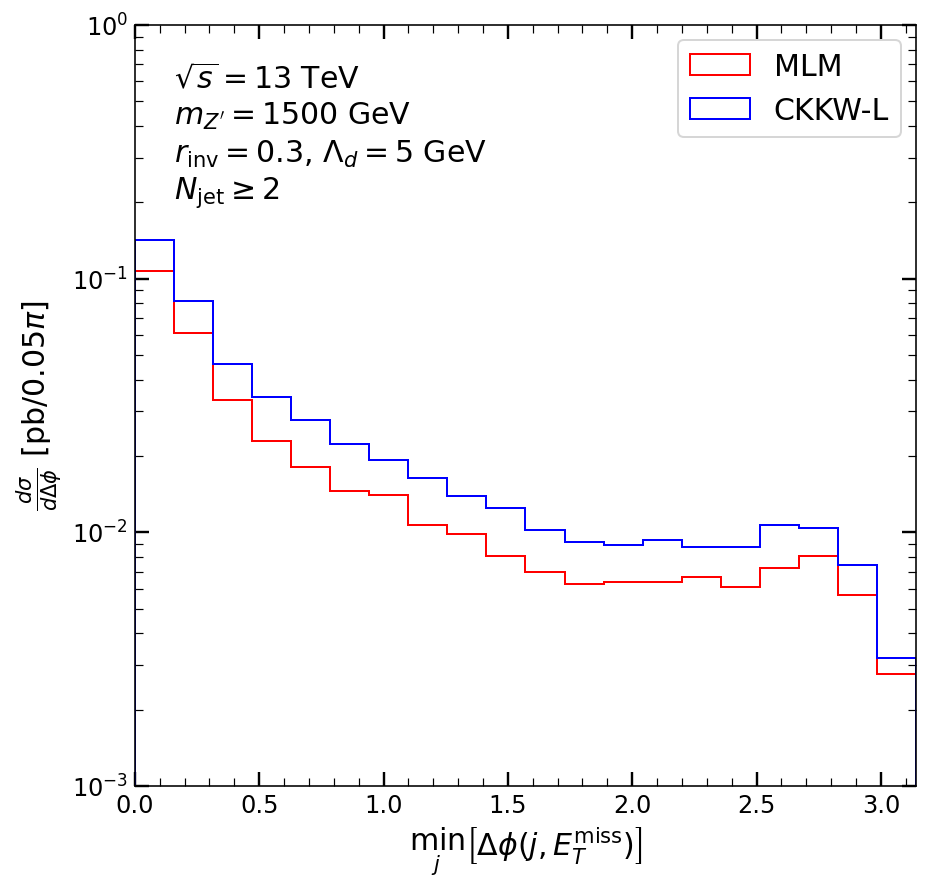

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [44]:
# 32. \min\Delta\phi(j, MET) when N_jet >= 2, set_title='The Minimum Azimuthal Separation between Any Jets and MET'
hist, bins = plotting('min_Dphi_j_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_32-dijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

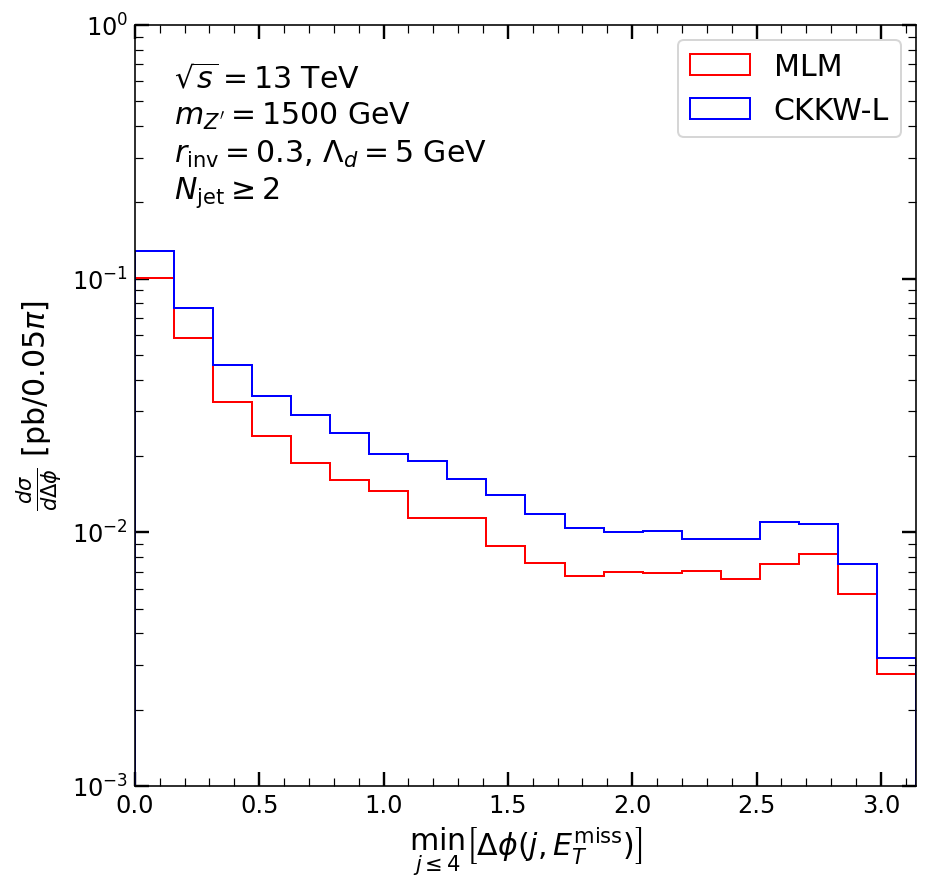

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.36272048 0.50233748] pb


In [45]:
# 33. \min_{j<=4}\Delta\phi(j, MET) when N_jet >= 2,
# set_title='The Minimum Azimuthal Separation\nbetween First Four Jets and MET'
hist, bins = plotting('min4_Dphi_j_MET', [dataset_mlm[8], dataset_ckkwl[8]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jj,
                      set_title=None,
                      xlabel=r'$\min_{j\leq 4}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet2, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_33-dijet-min4_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

### 3-4. Event selection $N_\mathrm{jet} \ge 3$

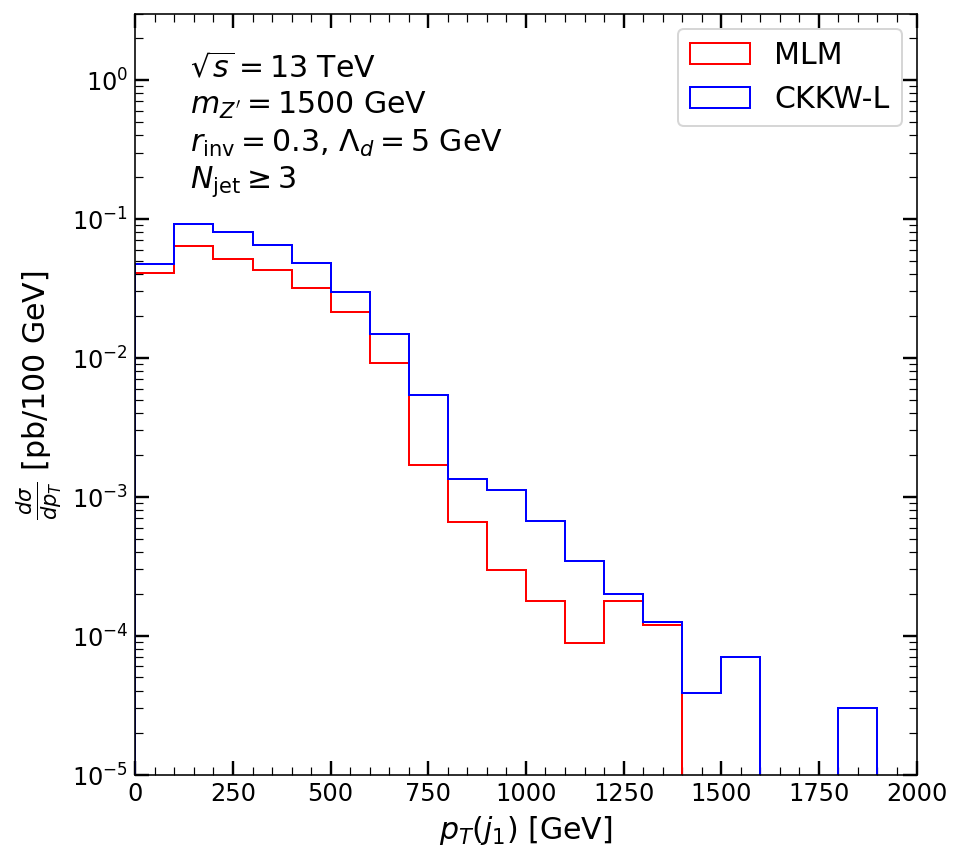

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [46]:
# 34. p_T(j_1) when N_jet >= 3
hist, bins = plotting('pT_1', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$p_T(j_1)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text_Njet3, text_xy=(0.07, 0.93), savefig='./figures_1_mlm_ckkwl/fig_34-trijet-pT_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

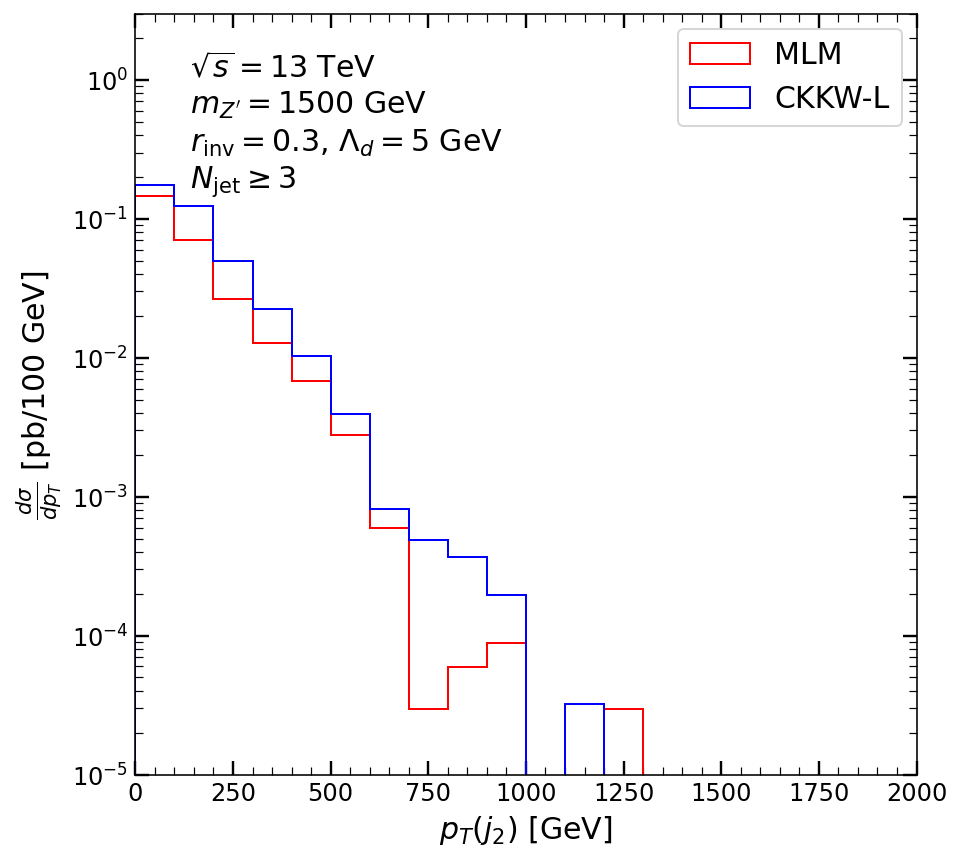

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [47]:
# 35. p_T(j_2) when N_jet >= 3
hist, bins = plotting('pT_2', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$p_T(j_2)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text_Njet3, text_xy=(0.07, 0.93), savefig='./figures_1_mlm_ckkwl/fig_35-trijet-pT_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

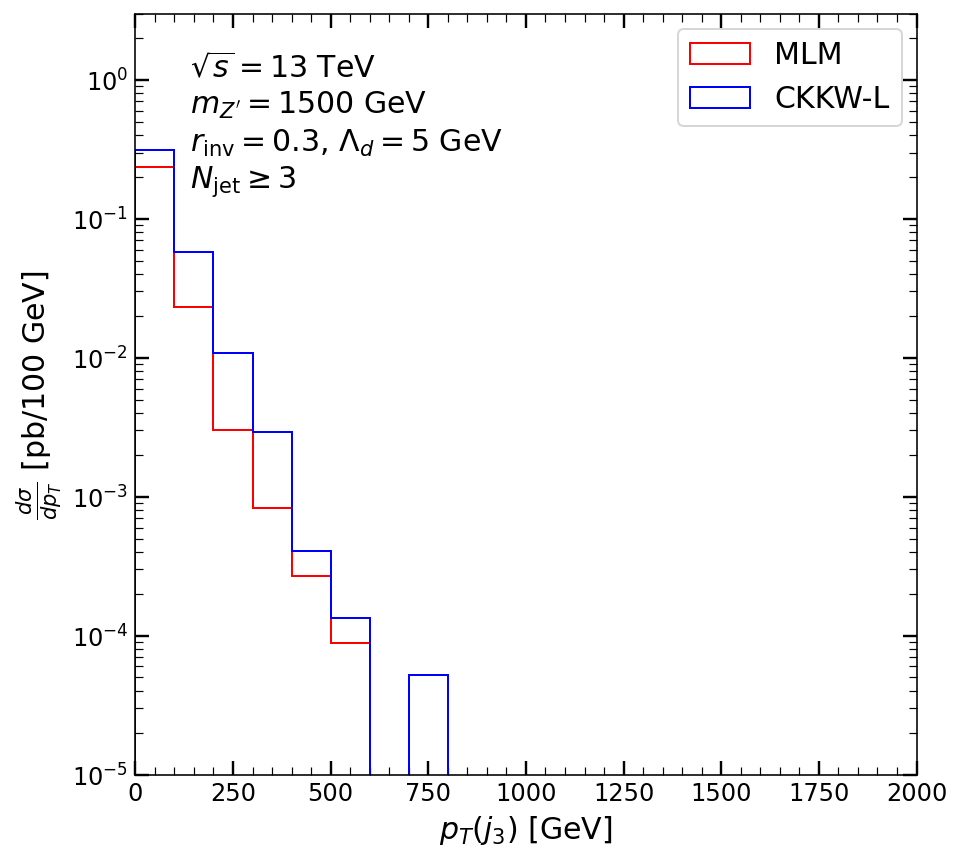

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [48]:
# 36. p_T(j_3) when N_jet >= 3
hist, bins = plotting('pT_3', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$p_T(j_3)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dp_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 2000), ylim=(1/100000, 3),
                      text=text_Njet3, text_xy=(0.07, 0.93), savefig='./figures_1_mlm_ckkwl/fig_36-trijet-pT_3.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

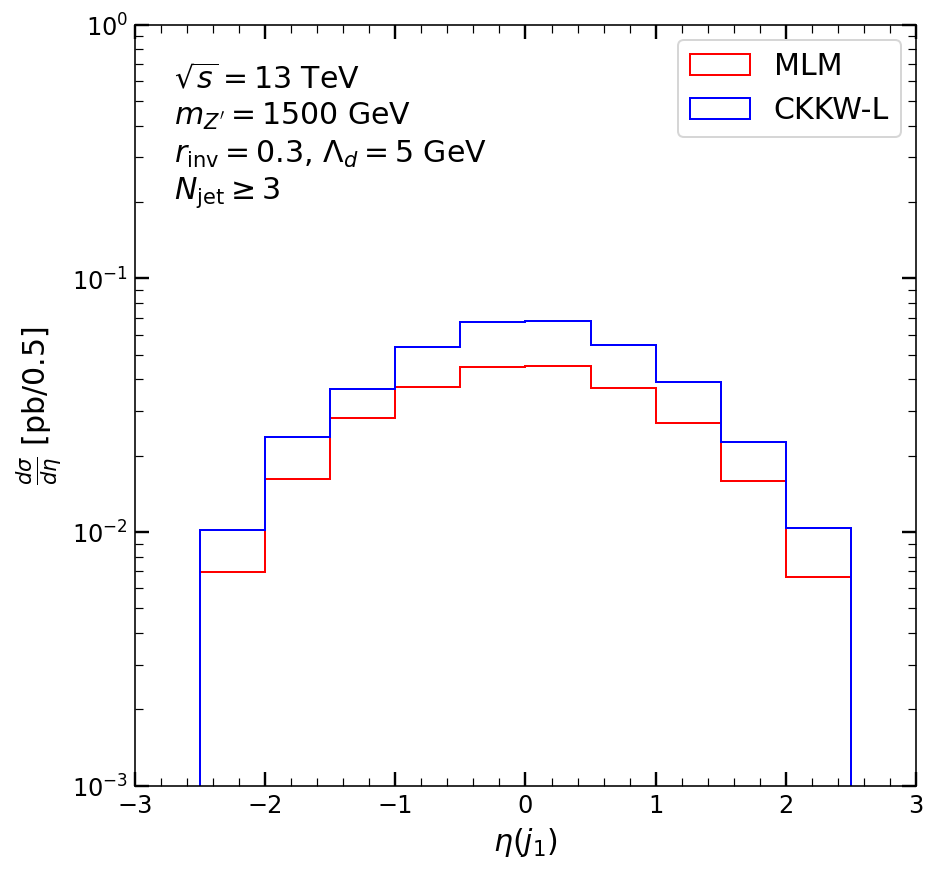

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [49]:
# 37. \eta(j_1) when N_jet >= 3
hist, bins = plotting('eta_1', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\eta(j_1)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_37-trijet-eta_1.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

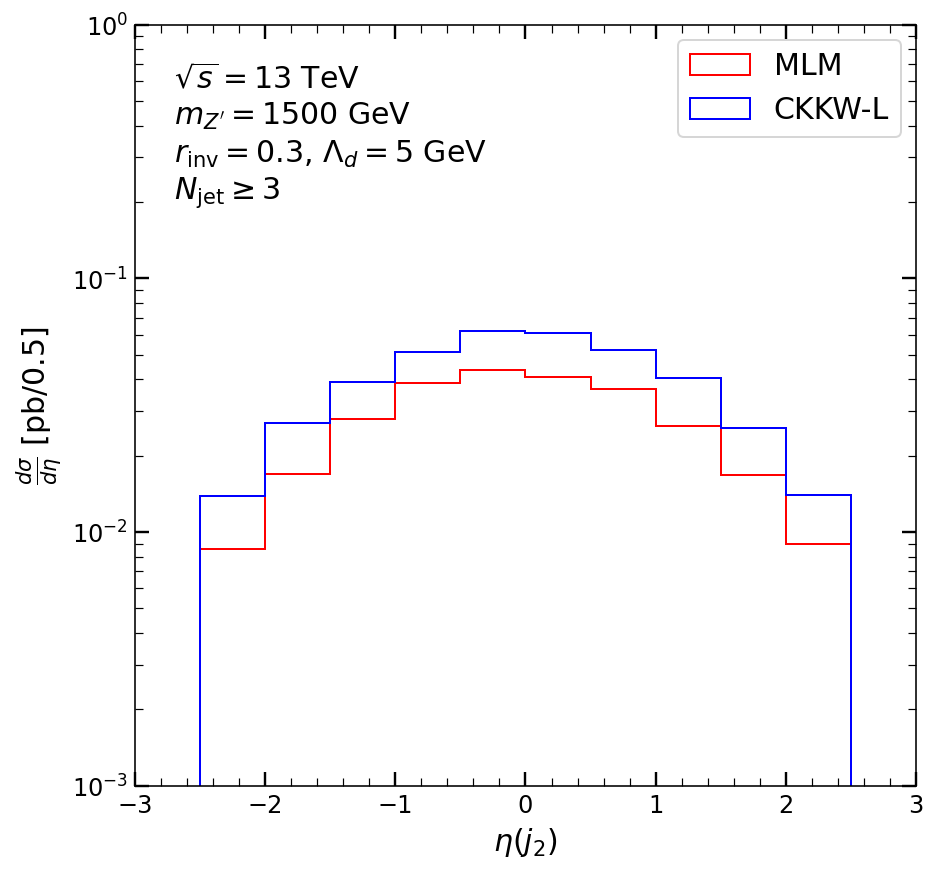

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [50]:
# 38. \eta(j_2) when N_jet >= 3
hist, bins = plotting('eta_2', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\eta(j_2)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_38-trijet-eta_2.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

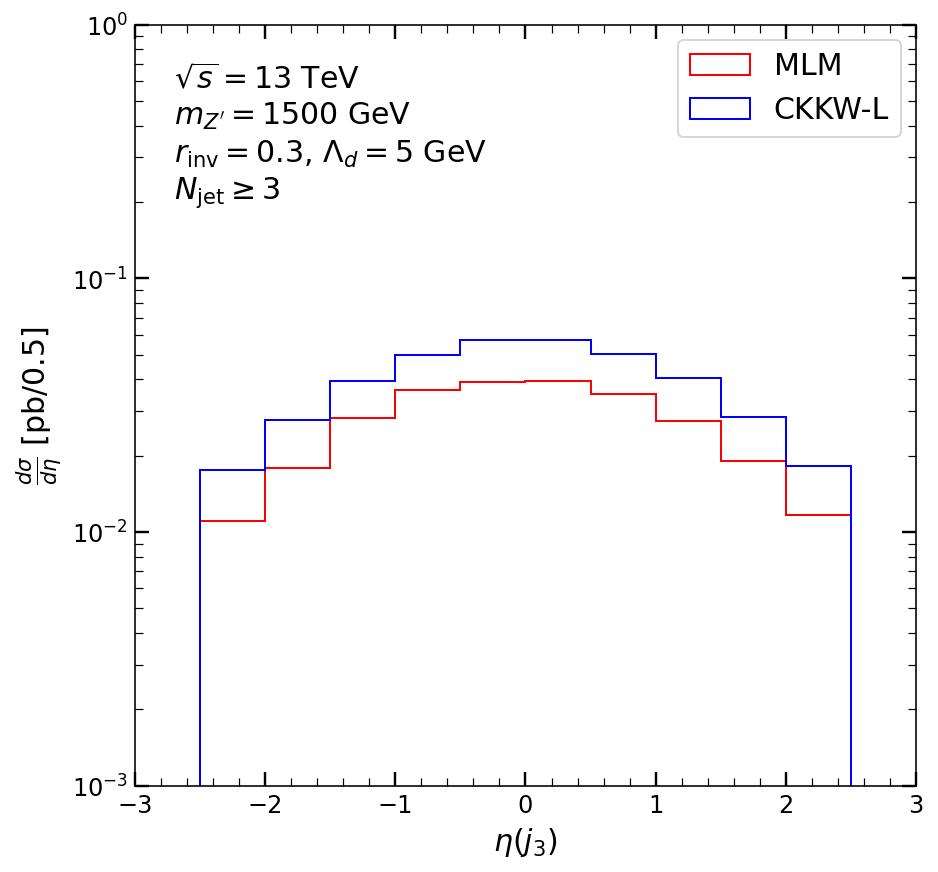

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [51]:
# 39. \eta(j_3) when N_jet >= 3
hist, bins = plotting('eta_3', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning_eta, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\eta(j_3)$',
                      ylabel=r'$\frac{d\sigma}{d\eta}$ [pb/0.5]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(-3, 3), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_39-trijet-eta_3.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

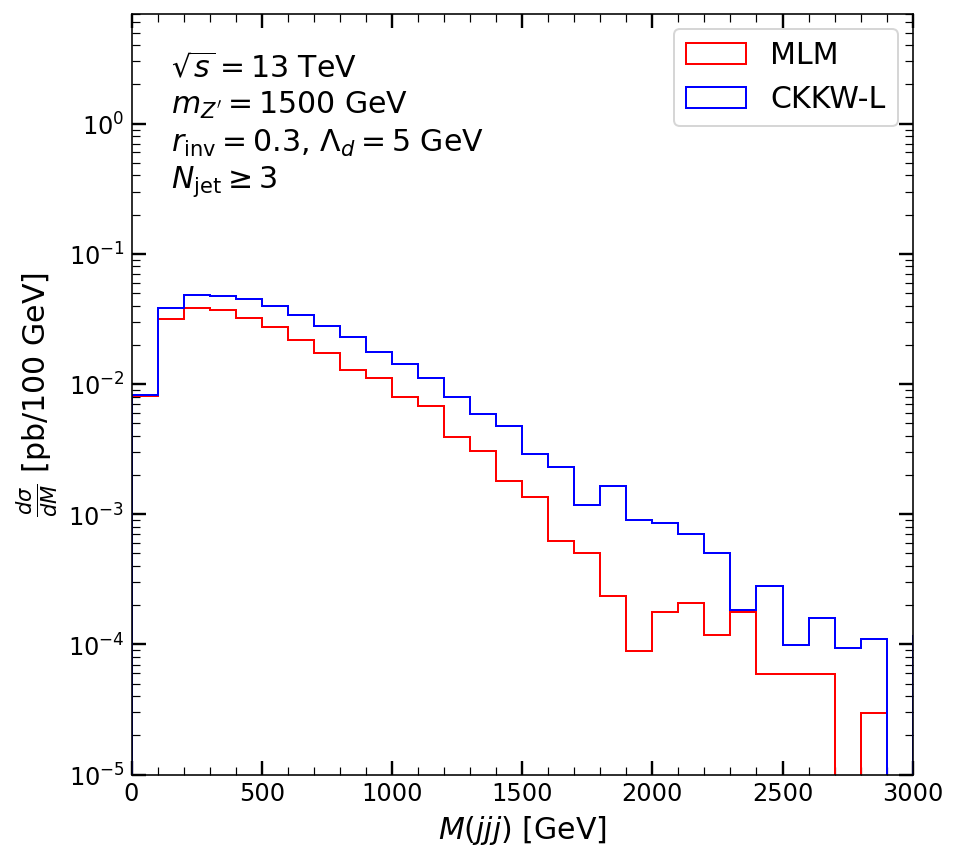

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [52]:
# 40. M(jjj) when N_jet >= 3
hist, bins = plotting('M_jjj', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$M(jjj)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 7),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_40-trijet-M_jjj.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

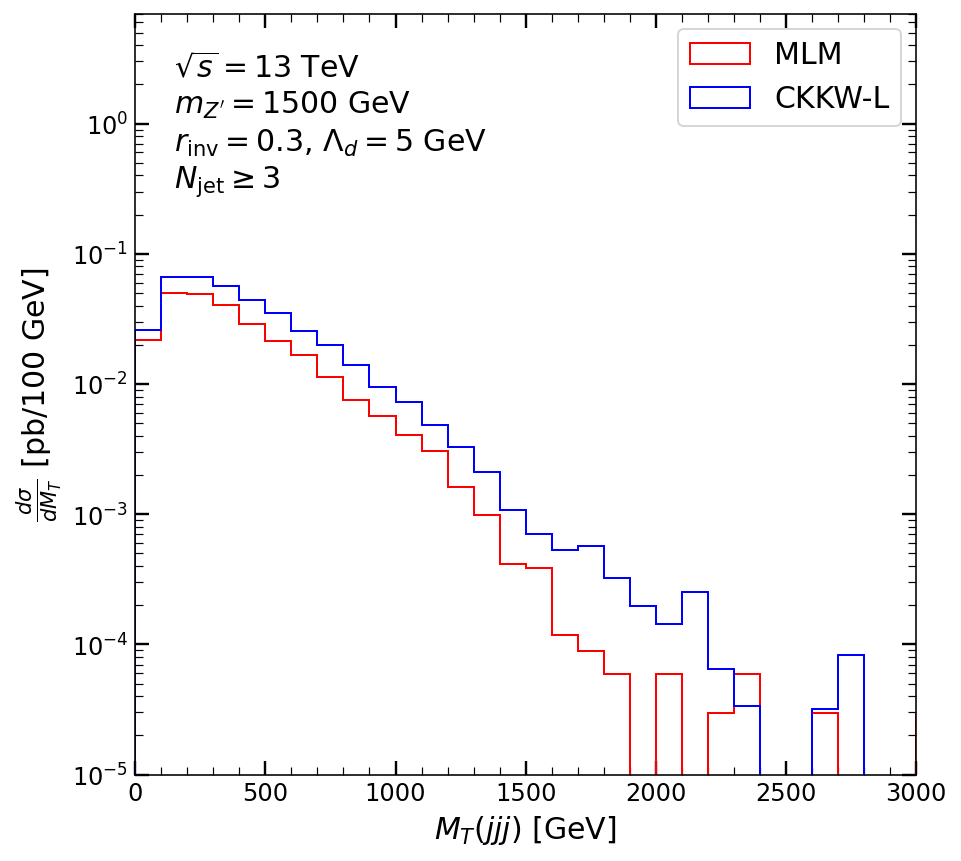

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [53]:
# 41. M_T(jjj) when N_jet >= 3
hist, bins = plotting('MT_jjj', [dataset_mlm[7], dataset_ckkwl[7]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$M_T(jjj)$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 7),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_41-trijet-MT_jjj.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

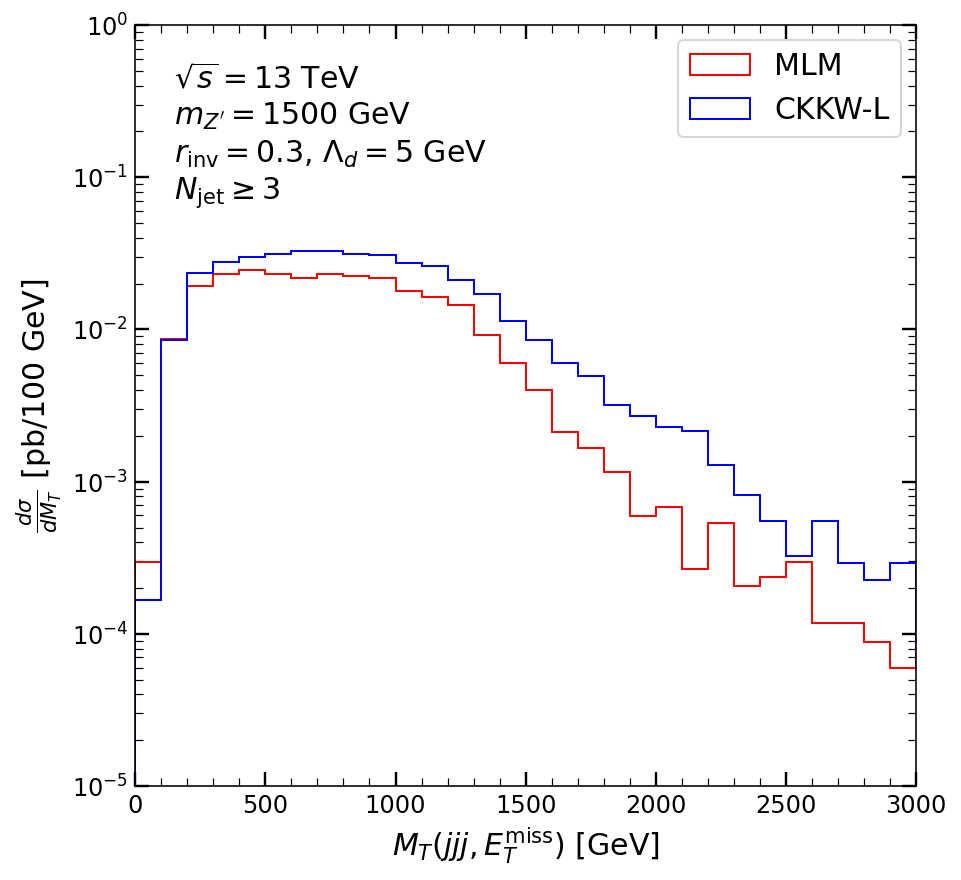

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [54]:
# 42. M_T(jjj, MET) when N_jet >= 3
hist, bins = plotting('MT_jjj_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$M_T(jjj, E_T^\mathrm{miss})$ [GeV]',
                      ylabel=r'$\frac{d\sigma}{dM_T}$ [pb/100 GeV]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, 3000), ylim=(1/100000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_42-trijet-MT_jjj_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

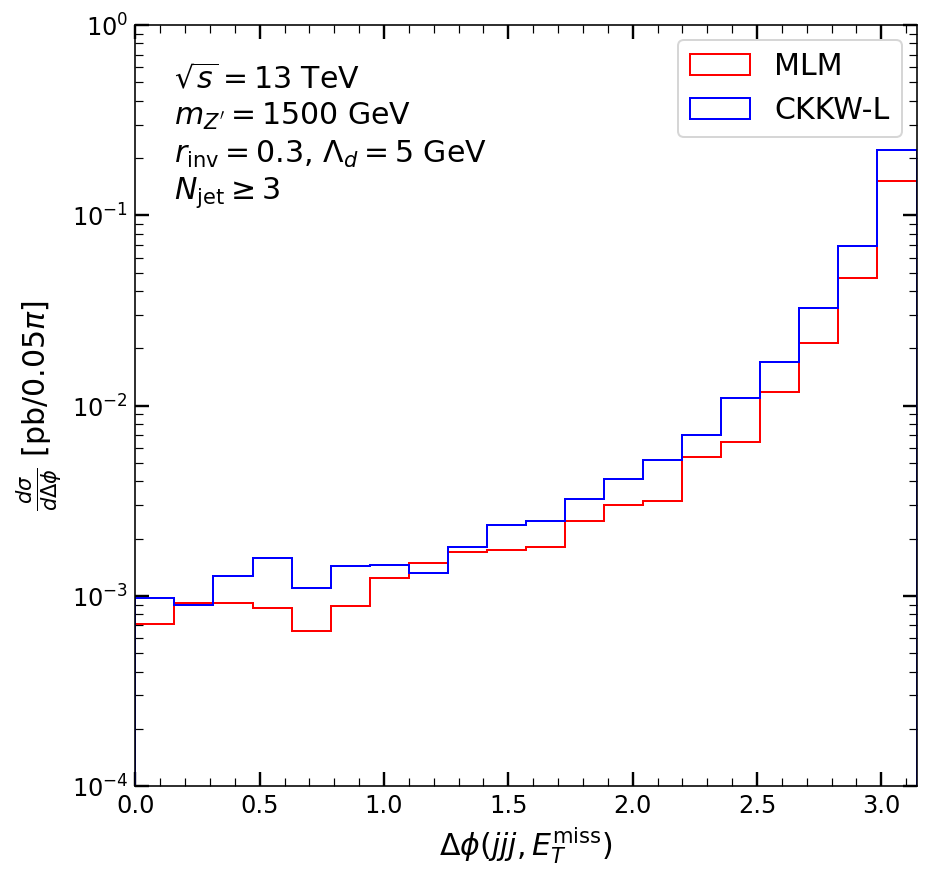

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [55]:
# 43. \Delta\phi(jjj, MET) when N_jet >= 3
hist, bins = plotting('Dphi_jjj_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(jjj, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_43-trijet-Dphi_jjj_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

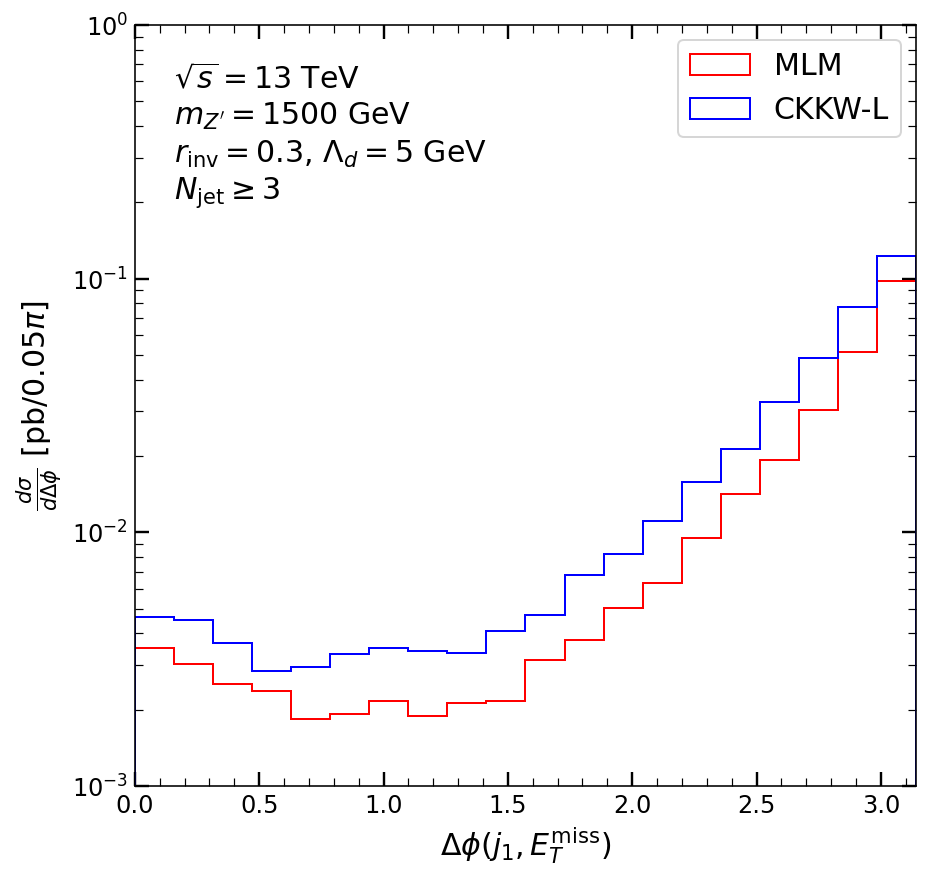

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [56]:
# 44. \Delta\phi(j_1, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j1_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_1, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_44-trijet-Dphi_j1_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

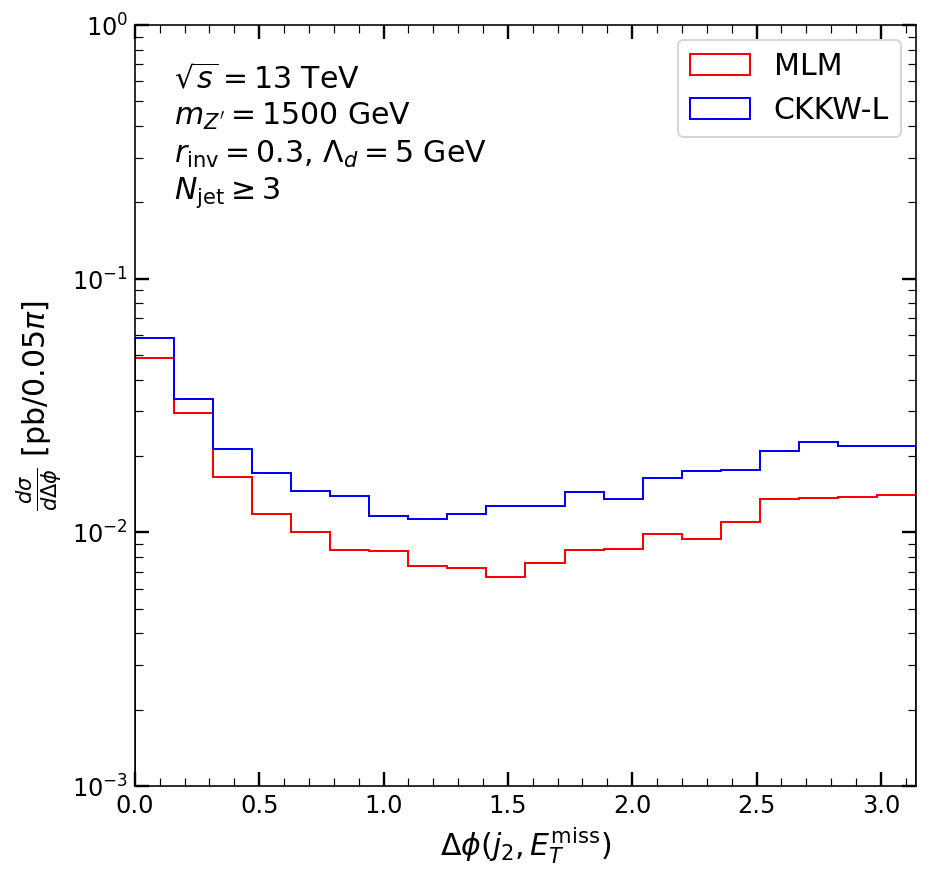

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [57]:
# 45. \Delta\phi(j_2, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j2_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_2, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_45-trijet-Dphi_j2_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

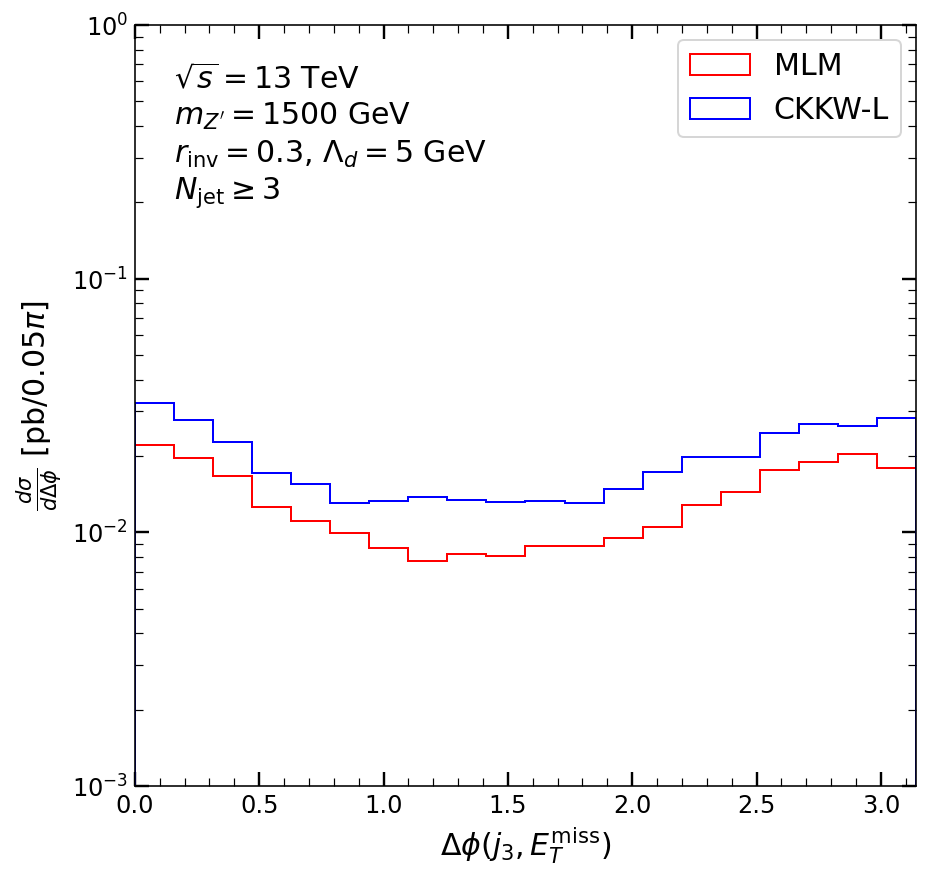

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [58]:
# 46. \Delta\phi(j_3, MET) when N_jet >= 3
hist, bins = plotting('Dphi_j3_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\Delta\phi(j_3, E_T^\mathrm{miss})$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/1000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_46-trijet-Dphi_j3_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

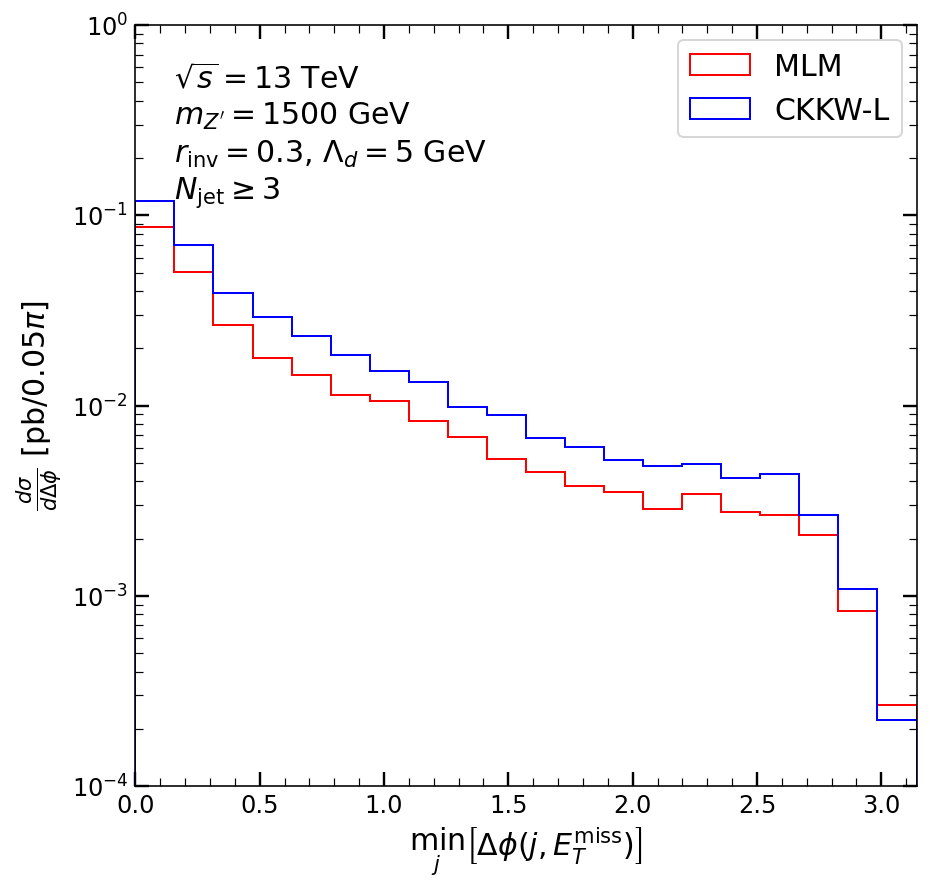

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [59]:
# 47. \min\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min_Dphi_j_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\min_j\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_47-trijet-min_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

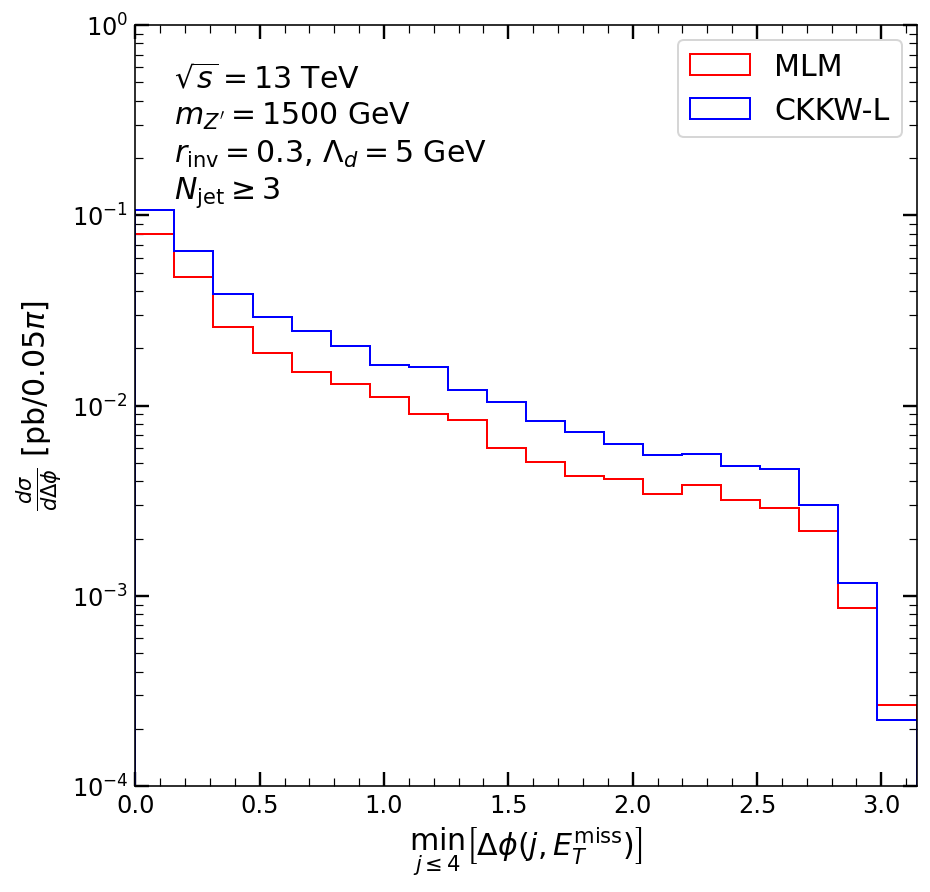

--------------------------------------------------------------------------------
Area of MLM and CKKW-L = [0.26468631 0.38612405] pb


In [60]:
# 48. \min_{j<=4}\Delta\phi(j, MET) when N_jet >= 3
hist, bins = plotting('min4_Dphi_j_MET', [dataset_mlm[9], dataset_ckkwl[9]],
                      binning_phi, color, label,
                      weight=weight, selected=selected_jjj,
                      set_title=None,
                      xlabel=r'$\min_{j\leq 4}\left[\Delta\phi(j, E_T^\mathrm{miss})\right]$',
                      ylabel=r'$\frac{d\sigma}{d\Delta\phi}$ [pb/$0.05\pi$]',
                      yscale='log', ymajor_locator=LogLocator(),
                      yminor_locator=LogLocator(base=10, subs='auto'),
                      xlim=(0, np.pi), ylim=(1/10000, 1),
                      text=text_Njet3, text_xy=text_xy, savefig='./figures_1_mlm_ckkwl/fig_48-trijet-min4_Dphi_j_MET.pdf')
print('-'*80)
print(f'Area of MLM and CKKW-L = {np.sum(hist, axis=1)} pb')

##### Conclusion: Brilliant!!

## Test

In [61]:
dataset_ckkwl[2]['N_jet'].astype('int64').dtypes

dtype('int64')

In [62]:
dataset_ckkwl[2].astype({'N_jet': 'int64'}).dtypes

N_jet       int64
pT_1      float64
pT_2      float64
pT_3      float64
pT_4      float64
eta_1     float64
eta_2     float64
eta_3     float64
eta_4     float64
phi_1     float64
phi_2     float64
phi_3     float64
phi_4     float64
mass_1    float64
mass_2    float64
mass_3    float64
mass_4    float64
dtype: object

In [63]:
print(np.arange(4))
np.histogram(np.arange(4), bins=np.arange(5))

[0 1 2 3]


(array([1, 1, 1, 1]), array([0, 1, 2, 3, 4]))

In [64]:
# np.histogram can still collect number of events when bins is smaller than some elements
a = np.arange(10)
bins = np.arange(5)
print(a)
print(bins)
print('-'*80)
np.histogram(a, bins=bins)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4]
--------------------------------------------------------------------------------


(array([1, 1, 1, 2]), array([0, 1, 2, 3, 4]))

In [65]:
w_1 = np.full(10, 2)
w_2 = np.arange(10)
print(w_1)
print(w_2)
print('-'*80)
print(np.histogram(a, bins=bins, weights=w_1))
print(np.histogram(a, bins=bins, weights=w_2))

[2 2 2 2 2 2 2 2 2 2]
[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------------------------------------
(array([2, 2, 2, 4]), array([0, 1, 2, 3, 4]))
(array([0, 1, 2, 7]), array([0, 1, 2, 3, 4]))
